# Project: Multi-Objective Optimization

**Deadline**: <u>November 4, 2025 at 10:00 p.m.</u> (SGT)

## Guidelines for Submission

### A. Submission Package
1. Submit **one ZIP file per group** named **`EC_Group_<xy>.zip`**, where `<xy>` is your group number.  
   *Example:* `EC_Group_22.zip`
2. The ZIP must contain the following files:
   - **`CEG5302_Group_Project_<xy>.ipynb`** — your main Jupyter Notebook  
   - **`report_<xy>.pdf`** — your 2–3 page report  
   *Example:* `CEG5302_Group_Project_22.ipynb` and `report_22.pdf`

### B. General Requirements
1. Each group has **four members** and submits **only one** ZIP.  
2. The Jupyter Notebook must clearly display **Python 3 code** and its **generated results**.
3. The notebook must be **fully executable top-to-bottom** to reproduce all figures directly from code.  
   Do **not** insert external image files; all plots/images must be produced during execution.  
   <span style="color:red;">Files with the `.py` extension are not accepted.</span>
4. Before submitting, **rerun the entire notebook** to confirm it executes without errors.  
   Code that cannot be executed or produces errors will result in **point deductions**.

### C. File-Naming Examples
- Group 07 → `EC_Group_07.zip` → contains `CEG5302_Group_Project_07.ipynb`, `report_07.pdf`  


In [1]:
import numpy as np

## Part 1. Continuous Multi-Objective Optimization
In this part, we have implemented the two-objective ZDT3 problem [1] and the vehicle crashworthiness design problem [2], and provided examples on how to use them. <u>**Your task is to implement <span style="color:blue;">NSGA-II</span> and use it to solve these two problems**</u>.

[1] Zitzler, E., Deb, K., & Thiele, L. (2000). Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary computation, 8(2), 173-195.

[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using a stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

### Introduction to a Two-Objective Test Problem: ZDT3 
The ZDT test suite [1] is a well-known set of benchmark problems in multi-objective optimization. It was introduced by Zitzler, Deb, and Thiele in 2000 to evaluate the performance of multi-objective optimization algorithms. ZDT3 is one of the test problems in the ZDT test suite.

- Number of objectives: 2
- Number of decision variables: 30

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=\mathbf{x} \\
f_2(\mathbf{x})=g(\mathbf{x}) h(\mathbf{x})
\end{array}\:,\right. \\
&\mathrm{where} \enspace g(\mathbf{x})=1+\frac{9}{n-1} \sum_{i=2}^n x_i, \\
& \qquad \enspace h(\mathbf{x})=1-\sqrt{f_1(\mathbf{x}) / g(\mathbf{x})}-\left(f_1(\mathbf{x}) / g(\mathbf{x})\right) \sin \left(10 \pi f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$

[1] E. Zitzler, K. Deb, and L. Thiele, Comparison of multiobjective evolutionary algorithms: Empirical results, Evolutionary computation, 2000, 8(2): 173-195.

In [ ]:
class ZDT3():

    def __init__(self):
        self.name = 'ZDT3'
        self.n_obj = 2  # number of objectives
        self.n_var = 30  # number of decision variables

        self.lower = np.zeros(self.n_var)  # lower bound of decision variables
        self.upper = np.ones(self.n_var)  # upper bound of decision variables

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj)) # for each chromosom, we have 2 objective function evals.
        f[:, 0] = x[:, 0]
        g = 1.0 + 9.0 * np.sum(x[:, 1:], axis=1) / (self.n_var - 1)
        h = 1 - np.power(
            f[:, 0] * 1.0 / g,
            0.5) - (f[:, 0] * 1.0 / g) * np.sin(10 * np.pi * f[:, 0])
        f[:, 1] = g * h

        return f

In [ ]:
# Create an instance of ZDT3
prob = ZDT3()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = ZDT3
Number of objectives = 2
Number of variables = 30
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)

print(f"x: {x}")

f = prob.evaluate(x)
print(f"f(x) = {f}")


x: [[0.93693676 0.16532061 0.10205129 0.55404163 0.9797038  0.65638449
  0.44868288 0.38543203 0.27516358 0.92409187 0.38231994 0.65521084
  0.31697582 0.20447672 0.36916805 0.25436992 0.69788373 0.81432438
  0.07117927 0.62468147 0.79340788 0.30260543 0.32146685 0.26335243
  0.84109783 0.09368195 0.81464588 0.05356775 0.39894592 0.93481267]]
f(x) = [[0.93693676 3.89240035]]


In [ ]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)


f = prob.evaluate(x)
print(f"f(x) = {f}")

f(x) = [[0.8467528  2.48249452]
 [0.81146353 3.09112858]
 [0.17455803 5.12403614]
 [0.23371943 3.05386776]
 [0.94508946 4.15185793]]


### TODO: Implement NSGA-II and Solve ZDT3 (30 marks)

Your task is **to implement NSGA-II, use it to solve ZDT3, obtain the final population, and visualize the final population.** 

To help you get started, we have provided skeleton code for NSGA-II, which serves as a starting point for you to add your own implementation. Please note that you **should not modify the framework** we have given you. More precisely, edit the "TODO" parts and do not introduce other functions.  Additionally, we have also provided you with code to create instances of the NSGA2() and ZDT3() classes.

An example of the expected output is shown in the following figure, which displays the true Pareto front of ZDT3 (represented by red lines) and the final population obtained by NSGA-II (represented by grey circles). Your final solutions should be similar to these grey circles.

<img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_ZDT3.png?raw=true" alt="ZDT3" width="40%">

It is crucial to ensure that your code runs successfully, as failing to do so may result in a zero mark for this task. If you face difficulties in implementing NSGA-II in this part, you can refer to available source codes online, such as [PlatEMO](https://github.com/BIMK/PlatEMO/blob/master/PlatEMO/Algorithms/Multi-objective%20optimization/NSGA-II/NSGAII.m) and [pymoo](https://github.com/anyoptimization/pymoo/blob/main/pymoo/algorithms/moo/nsga2.py), or seek assistance from ChatGPT.

In [ ]:
class NSGA2():
    def __init__(self, pop_size=100, ):
        self.pop_size = pop_size
        #-----------BEGIN-----------#
        # TODO: Include other parameters you may use to create an 
        #       instance of NSGA2(), such as crossover probability 
        #       and mutation probability  
        #-----------END-----------#
        
    def initialize(self, prob):
        x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
            self.pop_size, prob.n_var)
        return x
    
    def fitness_assignment(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance
        # to assign non-domination rank and local crowding distance to each 
        # solution in the parent population, which will be used later in
        # tournament selection
        #-----------END-----------#
    
    def tournament_selection(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement tournament selection on parent population to  
        # construct a mating pool of size `pop_size` for crossover
        #-----------END-----------#
        
    def crossover(self, pc):
        #-----------BEGIN-----------#
        # TODO: Implement simulated binary crossover (SBX) to generate 
        #       offspring of size `pop_size`
        #-----------END-----------#
        
    def mutation(self, pm):
        #-----------BEGIN-----------#
        # TODO: Implement polynomial mutation (PM)
        #-----------END-----------#
        
        
    def environmental_selection(self, ):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance on
        # the combined population of parent population and offspring population
        # to select `pop_size` solutions for next population from combined population
        # of 2 * `pop_size` solutions
        #-----------END-----------#

        
    def run(self, prob, max_gen=500):
        # Initialization
        population_x = self.initialize(prob)
        population_fx = prob.evaluate(population_x)
                
        # Evolve until termination condition is met
        for i in range(1, max_gen):
            #-----------BEGIN-----------#
            # TODO:
            # fitness assignment of parent population
            # ?? = self.tournament_selection(?)
            # ??? = self.crossover(??)
            # offspring_x = self.mutation(???)
            # offspring_fx = prob.evaluate(offspring_x)           
            # Apply enviromental selection to select solutions
            [population_x, population_fx]  = environmental_selection([population_x, offspring_x])
       
        return population_x, population_fx

In [ ]:
# Instantiate class NSGA2() and class ZDT3()
optimizer = NSGA2(pop_size=100, ??)
problem = ZDT3()

# Use NSGA-II to solve the ZDT3 problem
[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=500)

#-----------BEGIN-----------#
# TODO: Plot the final population `optimum_fx` in the objective space
#-----------END-----------#

### TODO: Use NSGA-II to Solve a Real-World Problem: Crashworthiness Design of Vehicles (10 marks)

The automotive industry places great importance on structural optimization for crashworthiness. In a study by Liao et al. [2], the crashworthiness design of vehicles was modeled as a multi-objective optimization problem. The problem aims to minimize three objectives: weight ($f_1$), acceleration characteristics ($f_2$), and toe-board intrusion ($f_3$) of the vehicle design. The decision variables for the problem specify the thickness of five reinforced members around the frontal structure of the vehicle, respectively. You are required to use NSGA-II to optimize the following crashworthiness design problem.

- Number of objectives: 3
- Number of decision variables: 5

$$
\begin{aligned}
&\mathrm{minimize} \left\{\begin{aligned}
f_1(\mathbf{x})= \,& 1640.2823+2.3573285 x_1+2.3220035 x_2 \\
& +4.5688768 x_3+7.7213633 x_4 +4.4559504 x_5\\
f_2(\mathbf{x})= \,& 6.5856+1.15 x_1-1.0427 x_2+0.9738 x_3 \\
& +0.8364 x_4-0.3695 x_1 x_4+0.0861 x_1 x_5 \\
& +0.3628 x_2 x_4-0.1106 x_1^2-0.3437 x_3^2 \\
& +0.1764 x_4^2\\
f_3(\mathbf{x})= & -0.0551+0.0181 x_1+0.1024 x_2 \\
& +0.0421 x_3-0.0073 x_1 x_2+0.024 x_2 x_3 \\
& -0.0118 x_2 x_4-0.0204 x_3 x_4-0.008 x_3 x_5 \\
& -0.0241 x_2^2+0.0109 x_4^2\\
\end{aligned}\right., \\
& \mathrm{where} \enspace  1 \leq x_i \leq 3, \enspace i=1,\ldots,5.
\end{aligned}
$$


[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

Your task is to **instantiate the NSGA2() and CrashworthinessDesign() classes, use NSGA-II to solve the problem, obtain the final population, and visualize the final population**. 

You can refer to the example figures below for reference. The left figure displays the Pareto front approximated by combining solutions obtained by several state-of-the-art algorithms, and the right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_crash.png?raw=true" alt="PF of crash" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_crash.png?raw=true" alt="NSGA2 on crash" style="width: 40%;">
</div>

Note that while NSGA-II provides solutions that are in close proximity to the Pareto front, indicating good convergence, these solutions are not evenly distributed across the Pareto front. **What are the reasons behind the poor distribution of solutions obtained by NSGA-II? Do you have any suggestions for improving NSGA-II performance on this problem? Please share your thoughts and suggestions.**


In [7]:
class CrashworthinessDesign():

    def __init__(self):
        self.name = 'Crashworthiness design of vehicles'
        self.n_obj = 3
        self.n_var = 5

        self.lower = np.full(self.n_var, 1.0)
        self.upper = np.full(self.n_var, 3.0)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))

        x1 = x[:, 0]
        x2 = x[:, 1]
        x3 = x[:, 2]
        x4 = x[:, 3]
        x5 = x[:, 4]

        f[:, 0] = 1640.2823 + (2.3573285 * x1) + (2.3220035 * x2) + (
            4.5688768 * x3) + (7.7213633 * x4) + (4.4559504 * x5)
        f[:, 1] = 6.5856 + (1.15 * x1) - (1.0427 * x2) + (0.9738 * x3) + (
            0.8364 * x4) - (0.3695 * x1 * x4) + (0.0861 * x1 * x5) + (
                0.3628 * x2 * x4) - (0.1106 * x1 * x1) - (0.3437 * x3 * x3) + (
                    0.1764 * x4 * x4)
        f[:, 2] = -0.0551 + (0.0181 * x1) + (0.1024 * x2) + (0.0421 * x3) - (
            0.0073 * x1 * x2) + (0.024 * x2 * x3) - (0.0118 * x2 * x4) - (
                0.0204 * x3 * x4) - (0.008 * x3 * x5) - (0.0241 * x2 * x2) + (
                    0.0109 * x4 * x4)

        return f

In [8]:
# Create an instance of the crashworthiness design problem
prob = CrashworthinessDesign()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

NameError: name 'np' is not defined

In [ ]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f = prob.evaluate(x)
print(f"f(x) = {f}")

x =  [[2.25422765 2.56591786 1.43218949 2.79277976 1.03629398]
 [1.08607599 1.90339721 1.14015131 2.89243717 1.29014279]
 [2.99795364 2.47744079 2.00169486 1.22050017 1.6507178 ]
 [1.44277262 1.33794799 1.1318415  1.60075864 2.34207138]
 [1.55501507 2.89001119 1.21475104 2.92456522 2.47135307]]
f(x) = [[1.68427956e+03 1.08166384e+01 1.03034075e-01]
 [1.68055381e+03 1.12352475e+01 1.04330876e-01]
 [1.67902703e+03 8.48278395e+00 1.58288892e-01]
 [1.67475755e+03 9.28684517e+00 7.92721317e-02]
 [1.68980250e+03 1.14405235e+01 6.72905786e-02]]


In [ ]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class NSGA2() and class CrashworthinessDesign()
#   2. Use NSGA-II to solve the crashworthiness design problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. Share your thoughts on the questions above.
#-----------END-----------#

## Part 2. Constrained Multi-Objective Optimization

In this part, your task is to implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve constrained optimization problems.

### Introduction to a Constrained Optimization Problem: MW7

The MW test suite [3] is a constrained multi-objective optimization test suite proposed by Zhongwei Ma and Yong Wang. It is designed to evaluate the performance of constrained multi-objective optimization algorithms. MW7 is one of the test problems in the MW test suite. We have implemented the MW7() class and provided examples on how to use it below.

- Number of objectives: 2
- Number of decision variables: 15
- Number of constraints: 2

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=g_3(\mathbf{x}) x_1 \\
f_2(\mathbf{x})=g_3(\mathbf{x}) \sqrt{1-\left(f_1(\mathbf{x}) / g_3(\mathbf{x})\right)^2}
\end{array}\:,\right. \\
&\mathrm{subject~to} \enspace c_1(\mathbf{x})=\left(1.2+0.4 \sin (4 l)^{16}\right)^2-(f_1(\mathbf{x}))^2-(f_2(\mathbf{x}))^2 \geq 0,\\
& \qquad \qquad c_2(\mathbf{x})=(f_1(\mathbf{x}))^2 + (f_2(\mathbf{x}))^2 - \left(1.15 - 0.2 \sin (4 l)^8\right)^2 \geq 0,\\
&\mathrm{where} \enspace g_3(\mathbf{x})=1+\sum_{i=m}^n 2\left(x_i+\left(x_{i-1}-0.5\right)^2-1\right)^2, \\
& \qquad \enspace l=\arctan \left(f_2(\mathbf{x}) / f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$


[3] Ma, Z., & Wang, Y. (2019). Evolutionary constrained multiobjective optimization: Test suite construction and performance comparisons. IEEE Transactions on Evolutionary Computation, 23(6), 972-986.

In [1]:
import numpy as np

In [23]:
class MW7():

    def __init__(self):
        self.name = 'MW7'
        self.n_obj = 2  # number of objectives
        self.n_var = 15  # number of decision variables
        self.n_con = 2  # number of constraints

        self.lower = np.zeros(self.n_var)
        self.upper = np.ones(self.n_var)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))

        g3 = 1 + 2.0 * np.sum((x[:, self.n_obj - 1:] +
                               (x[:, self.n_obj - 2:-1] - 0.5)**2 - 1.0)**2,
                              axis=1)

        f[:, 0] = g3 * x[:, 0]
        f[:, 1] = g3 * (1 - (f[:, 0] / g3)**2)**0.5

        with np.errstate(divide='ignore'):
            l = np.arctan(f[:, 1] / f[:, 0])

        c[:, 0] = (1.2 + 0.4 * (np.sin(4 * l))**16)**2 - f[:, 0]**2 - f[:, 1]**2
        c[:, 1] = f[:, 0]**2 + f[:, 1]**2 - (1.15 - 0.2 * (np.sin(4 * l))**8)**2
        c = np.where(c < 0, -c, 0)  # the degree of constraint violation of x at each constraint

        return f, c

In [24]:
# Create an instance of MW7
prob = MW7()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Number of constraints = {prob.n_con}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = MW7
Number of objectives = 2
Number of variables = 15
Number of constraints = 2
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")  # Constraint Violation

x =  [[0.70163988 0.09930712 0.51731353 0.21592662 0.93834557 0.53581834
  0.72653424 0.134952   0.00361328 0.45815778 0.80265324 0.94760696
  0.87371807 0.84182865 0.72825263]]
f(x) = [[5.15035472 5.23030583]]
c(x) = [[52.44225285  0.        ]]
CV(x) = [[52.44225285]]


In [26]:
# Initialize a population with 2 solution and evaluate them
pop_size = 2
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")

x =  [[0.40174266 0.03847265 0.14311903 0.09783115 0.96145391 0.62389596
  0.85207384 0.93158706 0.92451191 0.78263337 0.99118304 0.782915
  0.72613365 0.57313358 0.76137901]
 [0.18960654 0.38273061 0.8949909  0.03204136 0.37361244 0.38269504
  0.10829915 0.39819302 0.52855696 0.1004465  0.30171112 0.14780921
  0.7657801  0.21771977 0.9584199 ]]
f(x) = [[ 2.19822566  5.01074706]
 [ 2.05896973 10.66218679]]
c(x) = [[ 27.44784156   0.        ]
 [116.47898115   0.        ]]
CV(x) = [[ 27.44784156]
 [116.47898115]]


### TODO: Implement Constrained NSGA-II and Solve MW7 (30 marks)
Your task is to **implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve the MW7 problem**.

You can refer to the example figures below for reference. The left figure (from [3]) displays the true Pareto front (represented by red points), the unconstrained Pareto front (represented by the blue line), and the feasible region (represented by the gray region). The right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the gray circles in the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_MW7.png?raw=true" alt="PF of MW7" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7.png?raw=true" alt="NSGA2 on MW7" style="width: 40%;">
</div>

Note that sometimes the solutions obtained by NSGA-II may not cover all segments of the Pareto front (as shown below). **What are the possible reasons? Please share your thoughts in your report.**

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_2.png?raw=true" alt="NSGA2 on MW7 2" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_3.png?raw=true" alt="NSGA2 on MW7 3" style="width: 40%;">
</div>

In [27]:
class CNSGA2():
    #-----------BEGIN-----------#
    # TODO: Implement the parameter-less constraint handling technique in NSGA-II
    def __init__(self,
                 pop_size=160,
                 pc=0.9,
                 pm=None,
                 eta_c=20,
                 eta_m=20,
                 seed=None,
                 # logging
                 verbose=True,
                 log_every=25,
                 alert_patience=75,
                 feas_eps=1e-6):
        self.pop_size = pop_size
        self.pc = pc
        self.pm = pm              # if None -> set to 1/n_var in run()
        self.eta_c = eta_c
        self.eta_m = eta_m
        self.verbose = verbose
        self.log_every = max(1, int(log_every))
        self.alert_patience = max(1, int(alert_patience))
        self.feas_eps = float(feas_eps)
        if seed is not None:
            np.random.seed(seed)

    def initialize(self, prob):
        return prob.lower + (prob.upper - prob.lower) * np.random.rand(self.pop_size, prob.n_var)

    # -------------------- dominance & crowding --------------------
    @staticmethod
    def _pareto_dominates(F, i, j):
        not_worse = np.all(F[i] <= F[j])
        strictly_better = np.any(F[i] < F[j])
        return (not_worse and strictly_better)

    @staticmethod
    def _crowding_distance(F_front):
        n, m = F_front.shape
        if n <= 2:
            return np.full(n, np.inf, dtype=float)
        dist = np.zeros(n, dtype=float)
        eps = 1e-12
        for k in range(m):
            order = np.argsort(F_front[:, k])
            vals  = F_front[order, k]
            vmin, vmax = vals[0], vals[-1]
            dist[order[0]]  = np.inf
            dist[order[-1]] = np.inf
            denom = (vmax - vmin)
            if denom < eps:
                continue
            norm = (vals - vmin) / denom
            for t in range(1, n-1):
                dist[order[t]] += (norm[t+1] - norm[t-1])
        return dist

    def _fast_nds(self, F):
        N = len(F)
        S = [[] for _ in range(N)]
        n_dom = np.zeros(N, dtype=int)
        fronts = [[]]
        for p in range(N):
            for q in range(N):
                if p == q: 
                    continue
                if self._pareto_dominates(F, p, q):
                    S[p].append(q)
                elif self._pareto_dominates(F, q, p):
                    n_dom[p] += 1
            if n_dom[p] == 0:
                fronts[0].append(p)

        all_fronts = []
        k = 0
        while fronts[k]:
            front = fronts[k]
            all_fronts.append(np.array(front, dtype=int))
            nxt = []
            for p in front:
                for q in S[p]:
                    n_dom[q] -= 1
                    if n_dom[q] == 0:
                        nxt.append(q)
            k += 1
            fronts.append(nxt)
        return all_fronts

    def fitness_assignment(self, F, CV):
        """
        Parameter-less constraint handling:
          - feasible (CV==0) first: fast-NDS + crowding
          - infeasible next: sort by CV asc (same CV -> same rank), 1D crowding on CV within each group
        Return rank (N,), crowd (N,)
        """
        N = F.shape[0]
        rank  = np.full(N, -1, dtype=int)
        crowd = np.zeros(N, dtype=float)

        feas = (CV <= self.feas_eps)
        feas_idx   = np.where(feas)[0]
        infeas_idx = np.where(~feas)[0]

        # Feasible: NDS + crowding
        if len(feas_idx) > 0:
            Ff = F[feas_idx]
            fronts_local = self._fast_nds(Ff)
            r = 0
            for fr in fronts_local:
                gidx = feas_idx[fr]
                rank[gidx] = r
                crowd[gidx] = self._crowding_distance(F[gidx])
                r += 1
            next_rank = r
        else:
            next_rank = 0

        # Infeasible: CV ascending groups
        if len(infeas_idx) > 0:
            order = infeas_idx[np.argsort(CV[infeas_idx])]
            eps_cv = 1e-16
            group = [order[0]]
            prev  = CV[order[0]]
            def flush_group(g, r):
                g = np.array(g, dtype=int)
                rank[g]  = r
                cv_vals  = CV[g][:, None]
                crowd[g] = self._crowding_distance(cv_vals)
                return r + 1
            for u in order[1:]:
                if abs(CV[u] - prev) <= eps_cv:
                    group.append(u)
                else:
                    next_rank = flush_group(group, next_rank)
                    group = [u]
                    prev  = CV[u]
            next_rank = flush_group(group, next_rank)

        assert np.all(rank >= 0), "Some individuals did not get a rank."
        return rank, crowd

    # -------------------- selection / variation / selection --------------------
    # def tournament_selection(self, X, rank, crowd):
    #     N = len(X)
    #     sel = []
    #     for _ in range(N):
    #         i, j = np.random.randint(0, N), np.random.randint(0, N)
    #         better = (rank[i] < rank[j]) or (rank[i] == rank[j] and crowd[i] > crowd[j]) \
    #                  or (rank[i] == rank[j] and crowd[i] == crowd[j] and np.random.rand() < 0.5)
    #         sel.append(i if better else j)
    #     return X[np.array(sel)]
    def tournament_selection(self, X, rank, crowd):
        N = len(X)
        i = np.random.randint(0, N, size=N)
        j = np.random.randint(0, N, size=N)
        better = (rank[i] < rank[j]) | \
                ((rank[i] == rank[j]) & ((crowd[i] > crowd[j]) |
                ((crowd[i] == crowd[j]) & (np.random.rand(N) < 0.5))))
        idx = np.where(better, i, j)
        return X[idx]

    def crossover(self, parents, lower, upper):
        N, D = parents.shape
        children = np.empty_like(parents)
        order = np.random.permutation(N)
        for k in range(0, N, 2):
            p1 = parents[order[k]]
            p2 = parents[order[(k + 1) % N]]
            c1, c2 = p1.copy(), p2.copy()
            if np.random.rand() < self.pc:
                for d in range(D):
                    u = np.random.rand()
                    eta = self.eta_c
                    beta = (2*u)**(1/(eta+1)) if u <= 0.5 else (1/(2*(1-u)))**(1/(eta+1))
                    c1[d] = 0.5 * ((1 + beta) * p1[d] + (1 - beta) * p2[d])
                    c2[d] = 0.5 * ((1 - beta) * p1[d] + (1 + beta) * p2[d])
            children[order[k]] = c1
            children[order[(k + 1) % N]] = c2
        return np.clip(children, lower, upper)

    def mutation(self, X, lower, upper):
        N, D = X.shape
        pm = (1.0 / D) if (self.pm is None) else self.pm
        Y = X.copy()
        span = (upper - lower)
        for i in range(N):
            for d in range(D):
                if np.random.rand() < pm:
                    x = Y[i, d]
                    delta1 = (x - lower[d]) / span[d]
                    delta2 = (upper[d] - x) / span[d]
                    r = np.random.rand()
                    mut_pow = 1.0 / (self.eta_m + 1.0)
                    if r < 0.5:
                        xy = 1.0 - delta1
                        val = 2.0*r + (1.0 - 2.0*r) * (xy**(self.eta_m + 1.0))
                        deltaq = (val**mut_pow) - 1.0
                    else:
                        xy = 1.0 - delta2
                        val = 2.0*(1.0 - r) + 2.0*(r - 0.5) * (xy**(self.eta_m + 1.0))
                        deltaq = 1.0 - (val**mut_pow)
                    Y[i, d] = x + deltaq * span[d]
        return np.clip(Y, lower, upper)

    def environmental_selection(self, pop_x, pop_f, pop_cv, off_x, off_f, off_cv, pop_size):
        X  = np.vstack([pop_x, off_x])
        F  = np.vstack([pop_f, off_f])
        CV = np.concatenate([pop_cv, off_cv])
        rank, crowd = self.fitness_assignment(F, CV)

        take = []
        r = 0
        while True:
            front = np.where(rank == r)[0]
            if len(front) == 0:
                break
            if len(take) + len(front) <= pop_size:
                take.extend(front.tolist())
                r += 1
            else:
                rest = pop_size - len(take)
                sub  = front[np.argsort(-crowd[front])[:rest]]
                take.extend(sub.tolist())
                break

        take = np.array(take, dtype=int)
        assert len(take) == pop_size, "Selected next population size mismatch."
        return X[take], F[take], CV[take], rank, crowd

    # -------------------- logging --------------------
    def _log_header(self, prob, max_gen):
        print(f"[CNSGA2] Start | pop={self.pop_size} | max_gen={max_gen} | "
              f"n_obj={prob.n_obj} | n_var={prob.n_var} | log_every={self.log_every}", flush=True)

    def _log_gen(self, gen, max_gen, F, CV, rank, dt=None, first_feasible=False):
        feasible = (CV <= self.feas_eps)
        feas_cnt = int(np.sum(feasible))
        msg = (f"[Gen {gen:4d}/{max_gen}] feasible={feas_cnt}/{len(CV)} "
               f"({feas_cnt/len(CV):.1%}) | minCV={float(np.min(CV)):.3e} "
               f"| rank0_size={int(np.sum(rank==0))}")
        if dt is not None:
            msg += f" | dt={dt:.3f}s"
        if first_feasible:
            msg += "  <== first feasible(s) found"
        print(msg, flush=True)

    def _log_footer(self, F, CV):
        feasible = (CV <= self.feas_eps)
        feas_cnt = int(np.sum(feasible))
        print(f"[CNSGA2] Done | feasible in final pop: {feas_cnt}/{len(CV)} "
              f"({feas_cnt/len(CV):.1%}) | best CV={float(np.min(CV)):.3e}", flush=True)

    # -------------------- main loop --------------------
    # def run(self, prob, max_gen=500):
    #     import time
    #     if self.verbose:
    #         self._log_header(prob, max_gen)

    #     # init
    #     X = self.initialize(prob)
    #     F, C = prob.evaluate(X)
    #     CV = np.sum(C, axis=1)

    #     # true rank at gen 0
    #     rank0, _ = self.fitness_assignment(F, CV)
    #     if self.verbose:
    #         self._log_gen(0, max_gen, F, CV, rank=rank0, dt=None,
    #                       first_feasible=(np.min(CV) <= self.feas_eps))

    #     for gen in range(1, max_gen):
    #         t0 = time.time()

    #         # fitness on current population
    #         rank, crowd = self.fitness_assignment(F, CV)
    #         parents = self.tournament_selection(X, rank, crowd)

    #         children = self.crossover(parents, prob.lower, prob.upper)
    #         children = self.mutation(children, prob.lower, prob.upper)

    #         F_child, C_child = prob.evaluate(children)
    #         CV_child = np.sum(C_child, axis=1)

    #         # environmental selection -> next pop (selected)
    #         X, F, CV, _, _ = self.environmental_selection(
    #             X, F, CV, children, F_child, CV_child, self.pop_size
    #         )

    #         # recompute rank on SELECTED population for logging
    #         rank_sel, _ = self.fitness_assignment(F, CV)
    #         if self.verbose and (gen % self.log_every == 0):
    #             self._log_gen(gen, max_gen, F, CV, rank_sel, dt=time.time()-t0)

    #     # return X,F,C (matrix), not CV
    #     F_final, C_final = prob.evaluate(X)
    #     if self.verbose:
    #         self._log_footer(F_final, np.sum(C_final, axis=1))
    #     return X, F_final, C_final
    def run(self, prob, max_gen=500):
        import time
        if self.verbose:
            self._log_header(prob, max_gen)

        # init
        X = self.initialize(prob)
        F, C = prob.evaluate(X)
        CV = np.sum(C, axis=1)

        # 首次排序供第 1 代选择用
        rank, crowd = self.fitness_assignment(F, CV)
        if self.verbose:
            self._log_gen(0, max_gen, F, CV, rank=rank, dt=None,
                        first_feasible=(np.min(CV) <= self.feas_eps))

        for gen in range(1, max_gen):
            t0 = time.time()

            # 直接用“上一次选好的种群”的 rank/crowd 做锦标赛（不再重复算）
            parents = self.tournament_selection(X, rank, crowd)

            # 变异/交叉 + 只评估子代
            children = self.crossover(parents, prob.lower, prob.upper)
            children = self.mutation(children, prob.lower, prob.upper)
            F_child, C_child = prob.evaluate(children)
            CV_child = np.sum(C_child, axis=1)

            # 环境选择：这里会对“父∪子”进行一次排序（这一次是必须的）
            X, F, CV, _, _ = self.environmental_selection(
                X, F, CV, children, F_child, CV_child, self.pop_size
            )

            # 只在“被选中的种群”上做一次排序，结果留给下一代锦标赛使用
            rank, crowd = self.fitness_assignment(F, CV)

            if self.verbose and (gen % self.log_every == 0):
                self._log_gen(gen, max_gen, F, CV, rank, dt=time.time()-t0)

        # 结尾再评一次，保持你的返回契约
        F_final, C_final = prob.evaluate(X)
        if self.verbose:
            self._log_footer(F_final, np.sum(C_final, axis=1))
        return X, F_final, C_final


    #-----------END-----------#

In [29]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class CNSGA2() and class MW7()
#   2. Use NSGA-II with a contraint handling technique to solve the MW7 problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. In your report, answer the questions like: What are the possible reasons why the solutions 
#      obtained by NSGA-II fail to cover all segments of the Pareto front?
import matplotlib.pyplot as plt
import time

np.random.seed(42)
optimizer = CNSGA2(
    pop_size=180, pc=0.9, pm=None, eta_c=20, eta_m=20, seed=42,
    verbose=True, log_every=5, alert_patience=60, feas_eps=0.0
)
prob = MW7()

# 2) Solve MW7
t0 = time.time()
optimum_x, optimum_fx, optimum_c = optimizer.run(prob, max_gen=300)
optimum_cv = np.sum(optimum_c, axis=1)
elapsed = time.time() - t0

# Summary
feasible_mask = (optimum_cv <= optimizer.feas_eps)
num_feasible = int(np.sum(feasible_mask))
print(f"[Summary] Runtime: {elapsed:.2f}s | Feasible: {num_feasible}/{len(optimum_cv)} "
      f"({num_feasible/len(optimum_cv):.1%}) | Best CV: {float(np.min(optimum_cv)):.3e}")
if num_feasible > 0:
    feas_min = np.min(optimum_fx[feasible_mask], axis=0)
    print(f"[Summary] Feasible min objectives: [f1={feas_min[0]:.6g}, f2={feas_min[1]:.6g}]")

# 3) Plot final population (objective space)
plt.figure()
plt.scatter(optimum_fx[~feasible_mask, 0], optimum_fx[~feasible_mask, 1],
            s=10, alpha=0.5, label='infeasible', marker='x')
plt.scatter(optimum_fx[feasible_mask, 0], optimum_fx[feasible_mask, 1],
            s=18, alpha=0.9, label='feasible')
plt.xlabel('f1'); plt.ylabel('f2'); plt.title('Constrained NSGA-II on MW7')
plt.legend(); plt.tight_layout(); plt.show()

#-----------END-----------#

[CNSGA2] Start | pop=180 | max_gen=300 | n_obj=2 | n_var=15 | log_every=5
[Gen    0/300] feasible=0/180 (0.0%) | minCV=1.368e+01 | rank0_size=1
[Gen    5/300] feasible=0/180 (0.0%) | minCV=8.538e+00 | rank0_size=1 | dt=0.020s
[Gen   10/300] feasible=0/180 (0.0%) | minCV=5.807e+00 | rank0_size=1 | dt=0.018s
[Gen   15/300] feasible=0/180 (0.0%) | minCV=3.708e+00 | rank0_size=1 | dt=0.017s
[Gen   20/300] feasible=0/180 (0.0%) | minCV=2.266e+00 | rank0_size=1 | dt=0.016s
[Gen   25/300] feasible=0/180 (0.0%) | minCV=8.111e-01 | rank0_size=1 | dt=0.018s
[Gen   30/300] feasible=9/180 (5.0%) | minCV=0.000e+00 | rank0_size=1 | dt=0.023s
[Gen   35/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=4.594s
[Gen   40/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=4 | dt=5.194s
[Gen   45/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=7 | dt=5.405s
[Gen   50/300] feasible=180/180 (100.0%) | minCV=0.000e+00 | rank0_size=25 | dt=5.562s
[Gen   55/300] feas

KeyboardInterrupt: 

### TODO: Use Constrained NSGA-II to Solve the Assigned Constrained Multi-objective Optimization Problem (30 marks)

You will be assigned one constrained multi-objective problem (refer to the provided [Google Sheet file](https://docs.google.com/spreadsheets/d/16YdUPUa9-odsxajJ2FukP3yenpzy3Wl2gUPET8h2TDo/edit?usp=sharing) that you are required to solve using the constrained NSGA-II algorithm. 

Your task is to **implement the problem class** and **apply the constrained NSGA-II algorithm** to solve the given problem. Additionally, you need to perform parameter analysis to determine the optimal parameter settings for the algorithm, and discuss how the algorithm's parameters affect its performance. 

Finally, you should present your best results and provide some discussion.

Kumar, A., Wu, G., Ali, M. Z., Luo, Q., Mallipeddi, R., Suganthan, P. N., & Das, S. (2021). A benchmark-suite of real-world constrained multi-objective optimization problems and some baseline results. Swarm and Evolutionary Computation, 67, 100961.

In [ ]:
#-----------BEGIN-----------#
# TODO:
#   1. Implement the problem class for the assigned RCMx real-world problem
#   2. Instantiate the CNSGA2() class and the problem class
#   3. Use the constrained NSGA-II algorithm to solve the problem with a range of parameter settings
#   4. Analyze the performance of the algorithm with different parameter settings, including the 
#      population size, crossover and mutation probabilities, and maximum number of generations
#   5. Plot the final population `optimum_fx` in the objective space  using the best 
#      parameter settings that you found in Step 4.
#-----------END-----------#

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class RCM24_HEXNET_3obj:
    """
    RCM24 Heat Exchanger Network Design (3 objectives, 9 vars, 8 equalities).
    Objectives (min):
        f1 = 35*x1^0.6 + 35*x2^0.6
        f2 = 200*x1*x4 - x3
        f3 = 200*x1*x6 - x5     
    Equalities (h1..h8 == 0):
        h1 = 200*x1*x4 - x3
        h2 = 200*x2*x6 - x5
        h3 = x3 - 10000*(x7 - 100)
        h4 = x5 - 10000*(300 - x7)
        h5 = x3 - 10000*(600 - x8)
        h6 = x5 - 10000*(900 - x9)
        h7 = x4*ln(x8 - 100) - x4*ln(600 - x7) - x8 + x7 + 500
        h8 = x6*ln(x9 - x7) - x6*ln(600) - x9 + x7 + 600
    Bounds:
        x1∈[0,10], x2∈[0,200], x3∈[0,100], x4∈[0,200],
        x5∈[1e3, 2e6], x6∈[0,600], x7∈[100,600], x8∈[100,600], x9∈[100,900]
    """
    def __init__(self, debug=False, log_every=2000):
        self.name  = "RCM24-HEXNET (3obj official)"
        self.n_obj = 3
        self.n_var = 9
        self.n_con = 8

        self.lower = np.array([0.0,   0.0,   0.0,   0.0,   1_000.0, 0.0,   100.0, 100.0, 100.0])
        self.upper = np.array([10.0, 200.0, 100.0, 200.0, 2_000_000.0, 600.0, 600.0, 600.0, 900.0])

        self.debug = debug
        self._eval_calls = 0
        self._log_every  = max(1, int(log_every))

        # 约束缩放，使 8 条等式在 CV 中量级相近（保守上界）
        self._scale = np.array([
            4.0e5,   # h1
            2.4e7,   # h2
            5.0e6,   # h3
            3.0e6,   # h4
            5.0e6,   # h5
            8.0e6,   # h6
            1.0e3,   # h7
            1.0e3,   # h8
        ])

    def evaluate(self, X):
        N = len(X)
        F = np.zeros((N, self.n_obj))
        C = np.zeros((N, self.n_con))

        x1,x2,x3,x4,x5,x6,x7,x8,x9 = (X[:,i] for i in range(9))

        # ---- objectives ----
        F[:,0] = 35.0 * (np.power(np.maximum(x1,0.0), 0.6) + np.power(np.maximum(x2,0.0), 0.6))
        F[:,1] = 200.0 * x1 * x4 - x3
        F[:,2] = 200.0 * x1 * x6 - x5    

        # ---- equalities (raw residuals) ----
        h = np.empty((N, self.n_con))
        h[:,0] = 200.0 * x1 * x4 - x3
        h[:,1] = 200.0 * x2 * x6 - x5
        h[:,2] = x3 - 10000.0 * (x7 - 100.0)
        h[:,3] = x5 - 10000.0 * (300.0 - x7)
        h[:,4] = x3 - 10000.0 * (600.0 - x8)
        h[:,5] = x5 - 10000.0 * (900.0 - x9)

        # log domain（无效时给大残差，推动回可行域）
        arg71 = (x8 - 100.0);  arg72 = (600.0 - x7);  arg81 = (x9 - x7)
        mask7 = (arg71 > 0.0) & (arg72 > 0.0)
        mask8 = (arg81 > 0.0)

        h7 = np.full(N, 1e6)
        h8 = np.full(N, 1e6)
        h7[mask7] = x4[mask7]*np.log(arg71[mask7]) - x4[mask7]*np.log(arg72[mask7]) - x8[mask7] + x7[mask7] + 500.0
        h8[mask8] = x6[mask8]*np.log(arg81[mask8]) - x6[mask8]*np.log(600.0) - x9[mask8] + x7[mask8] + 600.0
        h[:,6] = h7; h[:,7] = h8

        # 违约度（非负）：缩放后的绝对残差
        C = np.abs(h) / self._scale

        # 轻量日志
        self._eval_calls += N
        if self.debug and (self._eval_calls % self._log_every == 0):
            maxraw = np.max(np.abs(h), axis=0)
            print("[RCM24] eval_calls=%d | log OK: h7=%.1f%%, h8=%.1f%% | max|h|=%s" %
                  (self._eval_calls, 100*np.mean(mask7), 100*np.mean(mask8),
                   ", ".join(f"{v:.2e}" for v in maxraw)), flush=True)

        return F, C


# ---------- 辅助工具：原始约束复核、可视化 ----------
def rcm24_raw_residuals(X):
    x1,x2,x3,x4,x5,x6,x7,x8,x9 = X.T
    h1 = 200*x1*x4 - x3
    h2 = 200*x2*x6 - x5
    h3 = x3 - 10000*(x7 - 100)
    h4 = x5 - 10000*(300 - x7)
    h5 = x3 - 10000*(600 - x8)
    h6 = x5 - 10000*(900 - x9)
    h7 = np.where(((x8-100)>0)&((600-x7)>0),
                  x4*np.log(x8-100) - x4*np.log(600-x7) - x8 + x7 + 500, 1e6)
    h8 = np.where(((x9-x7)>0),
                  x6*np.log(x9-x7) - x6*np.log(600) - x9 + x7 + 600, 1e6)
    return np.vstack([h1,h2,h3,h4,h5,h6,h7,h8]).T

def rcm24_scaled_violation_from_raw(H):
    scale = np.array([4e5, 2.4e7, 5e6, 3e6, 5e6, 8e6, 1e3, 1e3])
    return np.abs(H) / scale

def rcm24_check_raw_vs_C(X, C):
    H = rcm24_raw_residuals(X)
    C2 = rcm24_scaled_violation_from_raw(H)
    diff = np.abs(C - C2)
    print(f"[Check] max|C-C_raw|={diff.max():.3e}, mean={diff.mean():.3e}")
    return H, C2, diff

def plot_obj_pairs(F, feas_mask, labels=("f1","f2","f3")):
    for i in range(F.shape[1]):
        for j in range(i+1, F.shape[1]):
            plt.figure()
            plt.scatter(F[~feas_mask, i], F[~feas_mask, j], s=9, alpha=0.35, label="infeasible", marker="x")
            plt.scatter(F[feas_mask,  i], F[feas_mask,  j], s=16, alpha=0.9,  label="feasible")
            plt.xlabel(labels[i]); plt.ylabel(labels[j]); plt.title("RCM24 HEX-NET (pairwise)")
            plt.legend(); plt.tight_layout(); plt.show()

def print_violation_summary(C, eps=1e-6):
    CV = C.sum(axis=1)
    feas = CV <= eps
    print(f"Feasible count = {feas.sum()}/{len(C)}  (eps={eps})")
    for k in range(C.shape[1]):
        print(f"  c{k+1}: mean={C[:,k].mean():.2e} | 95%={np.quantile(C[:,k], 0.95):.2e} | max={C[:,k].max():.2e}")

def plot_violation_hist(C):
    cols = C.shape[1]
    fig, axes = plt.subplots(2, (cols+1)//2, figsize=(12, 5), constrained_layout=True)
    axes = np.array(axes).ravel()
    for k in range(cols):
        ax = axes[k]
        ax.hist(C[:,k], bins=40, alpha=0.8)
        ax.set_title(f"c{k+1} violation")
        ax.set_yscale("log")
    plt.show()


[CNSGA2] Start | pop=120 | max_gen=400 | n_obj=3 | n_var=9 | log_every=10
[Gen    0/400] feasible=0/120 (0.0%) | minCV=9.747e-01 | rank0_size=1
[Gen   10/400] feasible=0/120 (0.0%) | minCV=2.302e-01 | rank0_size=1 | dt=0.015s
[Gen   20/400] feasible=0/120 (0.0%) | minCV=4.078e-02 | rank0_size=1 | dt=0.013s
[Gen   30/400] feasible=0/120 (0.0%) | minCV=4.492e-03 | rank0_size=1 | dt=0.009s
[Gen   40/400] feasible=0/120 (0.0%) | minCV=1.992e-03 | rank0_size=1 | dt=0.011s
[Gen   50/400] feasible=0/120 (0.0%) | minCV=1.620e-03 | rank0_size=1 | dt=0.013s
[Gen   60/400] feasible=0/120 (0.0%) | minCV=2.778e-04 | rank0_size=1 | dt=0.014s
[Gen   70/400] feasible=0/120 (0.0%) | minCV=1.709e-04 | rank0_size=1 | dt=0.014s
[Gen   80/400] feasible=0/120 (0.0%) | minCV=8.231e-05 | rank0_size=1 | dt=0.010s
[Gen   90/400] feasible=0/120 (0.0%) | minCV=4.285e-05 | rank0_size=1 | dt=0.011s
[Gen  100/400] feasible=0/120 (0.0%) | minCV=3.019e-05 | rank0_size=1 | dt=0.011s
[Gen  110/400] feasible=0/120 (0.0%)

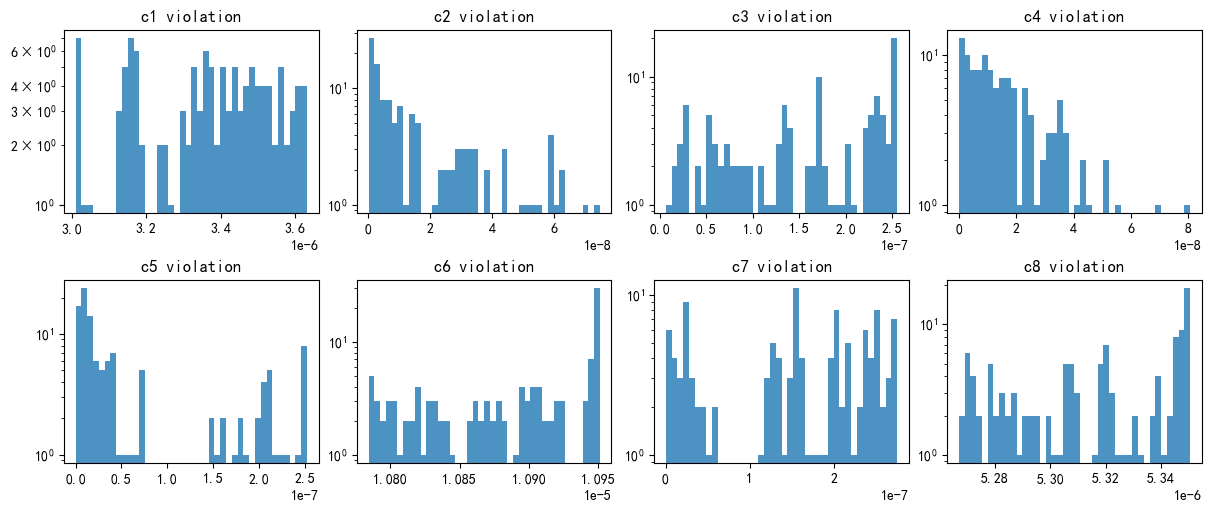

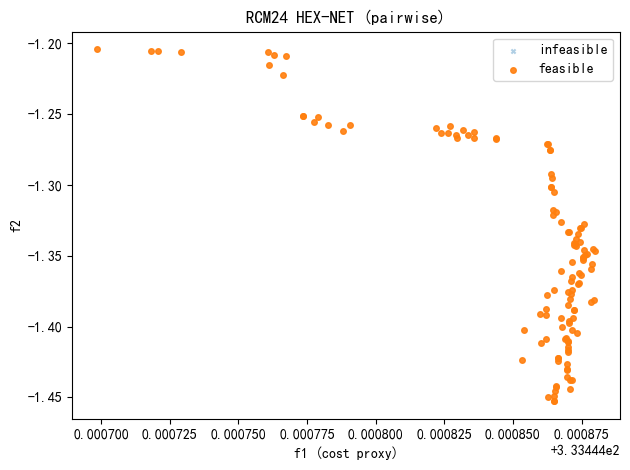

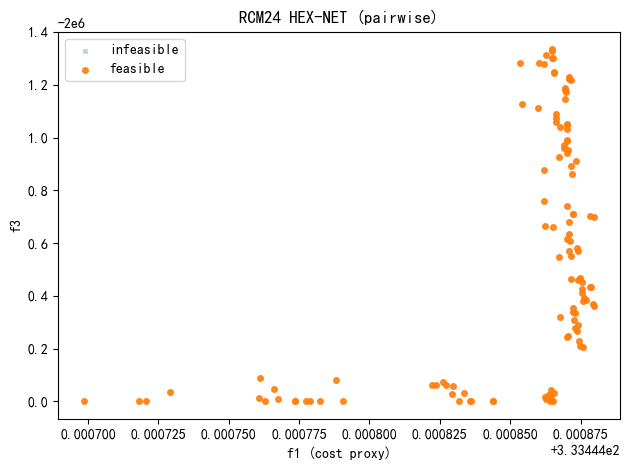

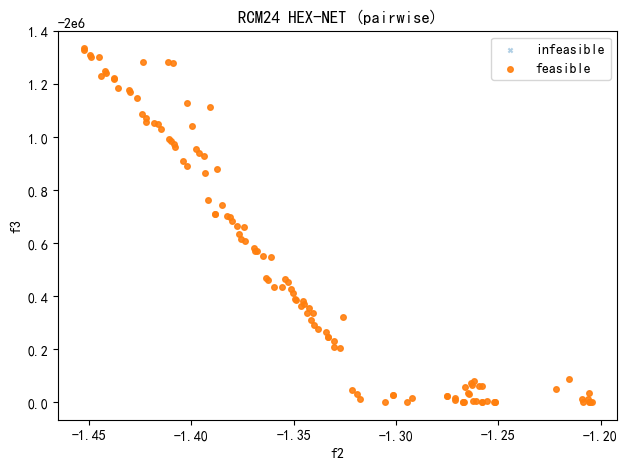

Objective spread (feasible-only if any): [1.81487153e-04 2.48533503e-01 1.33505160e+00]


In [36]:
# ==== 1) 实例化与运行 ====
prob = RCM24_HEXNET_3obj(debug=False)
best = CNSGA2(
    pop_size=120, pc=0.9, pm=None, eta_c=10, eta_m=15,
    seed=7, verbose=True, log_every=10, feas_eps=2e-5
)
X, F, C = best.run(prob, max_gen=400)

# ==== 2) 可行性与一致性体检 ====
CV   = np.sum(C, axis=1)
feas = (CV <= best.feas_eps)
print(f"[final] feasible: {np.sum(feas)}/{len(F)} (eps={best.feas_eps})")

# 原始等式 vs 你的 C（应当几乎一致）
H_raw, C_from_raw, diff = rcm24_check_raw_vs_C(X, C)

print_violation_summary(C, eps=best.feas_eps)
plot_violation_hist(C)

# ==== 3) 目标空间可视化（两两作图） ====
labels = ("f1 (cost proxy)","f2","f3")
plot_obj_pairs(F, feas_mask=feas, labels=labels)

# ==== 4) 一点健诊打印（是否塌点） ====
ptp = F[feas].ptp(axis=0) if np.any(feas) else F.ptp(axis=0)
print("Objective spread (feasible-only if any):", ptp)


目标函数值统计分析

总解数: 120
可行解数: 120 (100.00%)
不可行解数: 0

----------------------------------------------------------------------
所有解的目标函数统计:
----------------------------------------------------------------------
目标       最小值             最大值             均值              标准差         
----------------------------------------------------------------------
f1       3.3344e+02      3.3344e+02      3.3344e+02      3.9239e-05  
f2       -1.4527e+00     -1.2042e+00     -1.3440e+00     6.9457e-02  
f3       -2.0000e+06     -2.0000e+06     -2.0000e+06     4.5686e-01  

----------------------------------------------------------------------
可行解的目标函数统计:
----------------------------------------------------------------------
目标       最小值             最大值             均值              标准差         
----------------------------------------------------------------------
f1       3.3344e+02      3.3344e+02      3.3344e+02      3.9239e-05  
f2       -1.4527e+00     -1.2042e+00     -1.3440e+00     6.9457e-02  
f3       

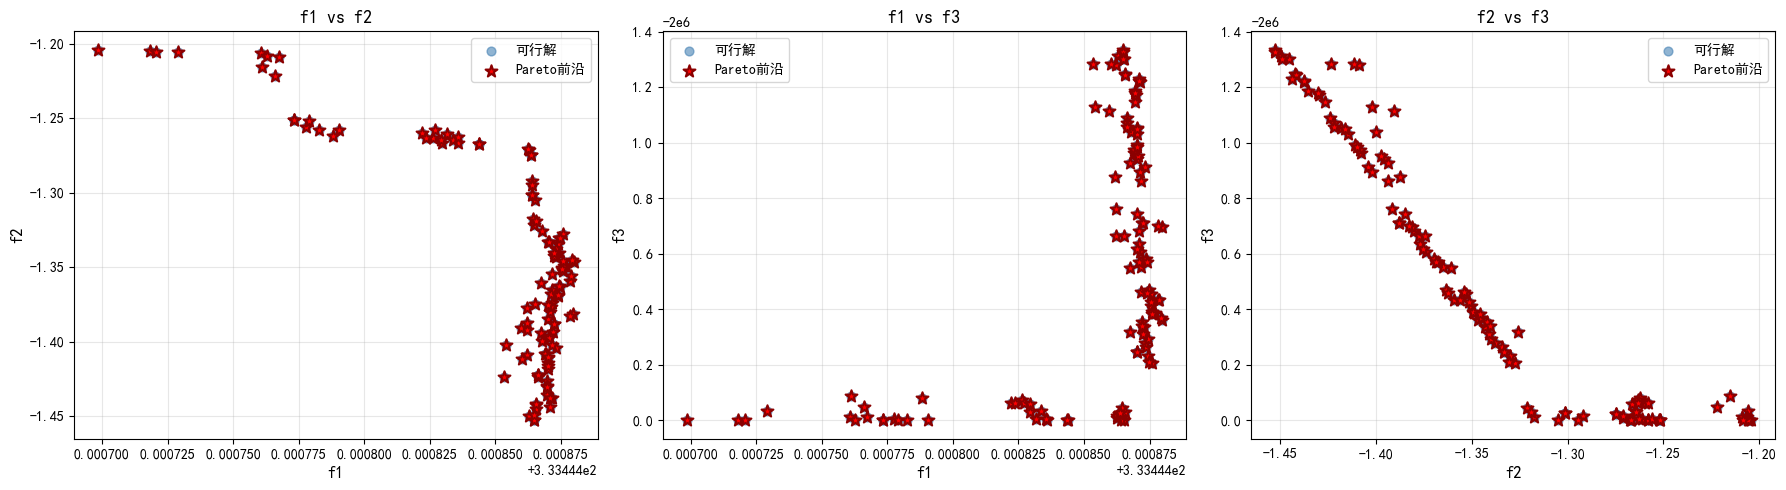

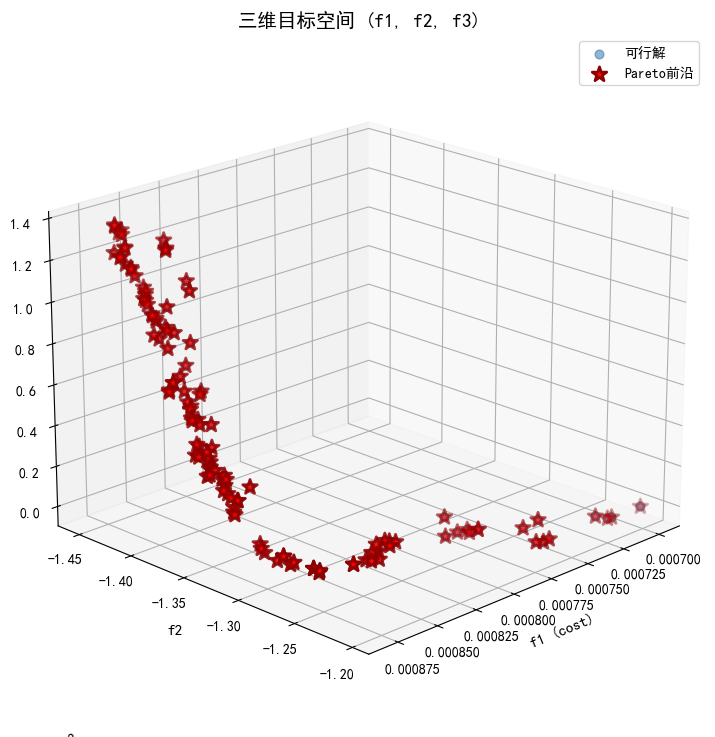

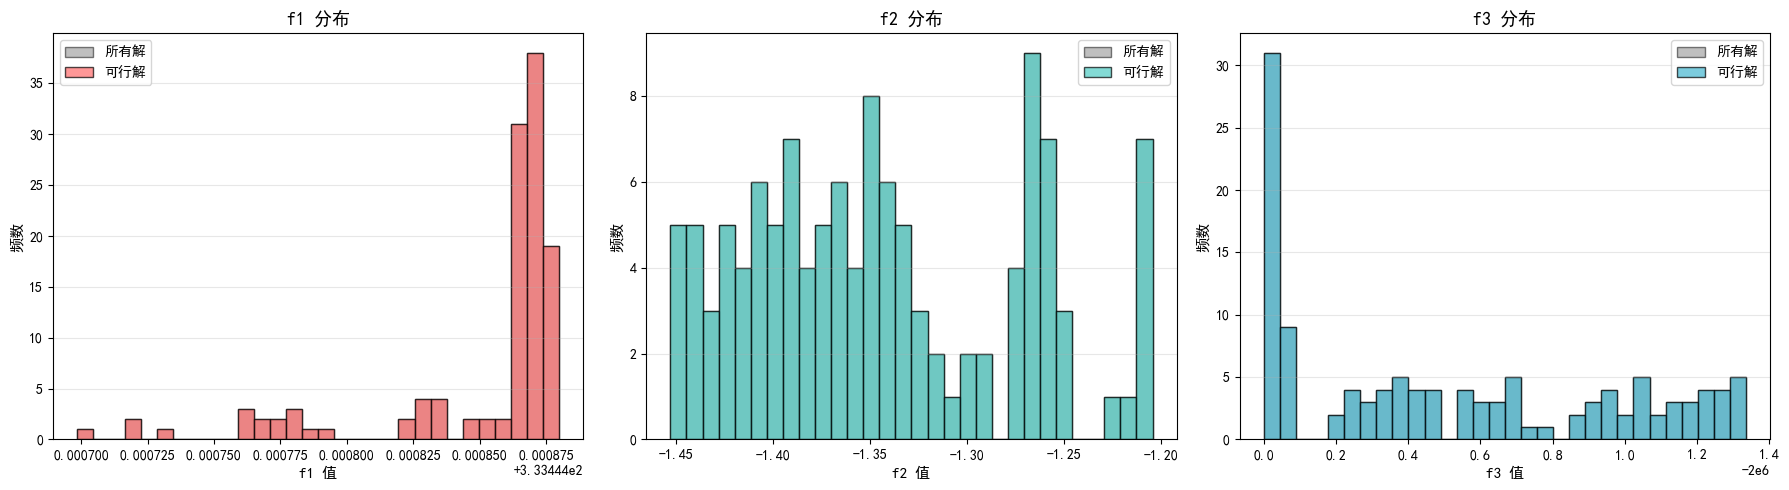

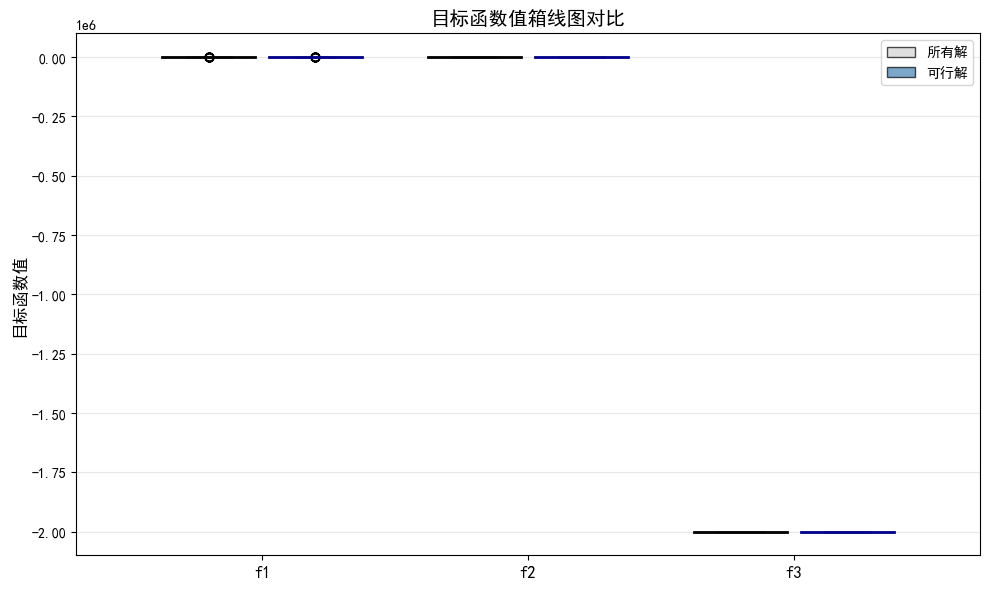


✅ 所有可视化图表已生成并保存！


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ==== 1) 基本统计信息输出 ====
print("="*70)
print("目标函数值统计分析")
print("="*70)

CV = np.sum(C, axis=1)
feas = (CV <= best.feas_eps)
feas_count = np.sum(feas)

print(f"\n总解数: {len(F)}")
print(f"可行解数: {feas_count} ({100*feas_count/len(F):.2f}%)")
print(f"不可行解数: {len(F) - feas_count}")

# 全部解的统计
print("\n" + "-"*70)
print("所有解的目标函数统计:")
print("-"*70)
print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
print("-"*70)
for i, label in enumerate(['f1', 'f2', 'f3']):
    print(f"{label:<8} {F[:,i].min():<15.4e} {F[:,i].max():<15.4e} "
          f"{F[:,i].mean():<15.4e} {F[:,i].std():<12.4e}")

# 可行解的统计（如果存在）
if feas_count > 0:
    print("\n" + "-"*70)
    print("可行解的目标函数统计:")
    print("-"*70)
    print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
    print("-"*70)
    F_feas = F[feas]
    for i, label in enumerate(['f1', 'f2', 'f3']):
        print(f"{label:<8} {F_feas[:,i].min():<15.4e} {F_feas[:,i].max():<15.4e} "
              f"{F_feas[:,i].mean():<15.4e} {F_feas[:,i].std():<12.4e}")
    
    # Pareto前沿分析
    print("\n" + "-"*70)
    print("Pareto前沿分析 (可行解中的非支配解):")
    print("-"*70)
    
    # 找出可行解中的Pareto前沿
    from itertools import combinations
    F_feas_idx = np.where(feas)[0]
    is_pareto = np.ones(len(F_feas), dtype=bool)
    
    for i, j in combinations(range(len(F_feas)), 2):
        if is_pareto[i]:
            # 检查 j 是否支配 i
            if np.all(F_feas[j] <= F_feas[i]) and np.any(F_feas[j] < F_feas[i]):
                is_pareto[i] = False
        if is_pareto[j]:
            # 检查 i 是否支配 j
            if np.all(F_feas[i] <= F_feas[j]) and np.any(F_feas[i] < F_feas[j]):
                is_pareto[j] = False
    
    pareto_count = np.sum(is_pareto)
    print(f"Pareto前沿解数量: {pareto_count}")
    
    if pareto_count > 0:
        F_pareto = F_feas[is_pareto]
        print(f"\n{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15}")
        print("-"*70)
        for i, label in enumerate(['f1', 'f2', 'f3']):
            print(f"{label:<8} {F_pareto[:,i].min():<15.4e} {F_pareto[:,i].max():<15.4e} "
                  f"{F_pareto[:,i].mean():<15.4e}")
else:
    print("\n⚠️ 警告: 没有找到可行解！")
    is_pareto = None

print("\n" + "="*70)


# ==== 2) 详细的目标函数值表格 ====
print("\n前10个解的详细信息:")
print("-"*90)
print(f"{'序号':<6} {'可行':<6} {'CV':<12} {'f1':<15} {'f2':<15} {'f3':<15}")
print("-"*90)
for i in range(min(10, len(F))):
    feas_str = "✓" if feas[i] else "✗"
    print(f"{i:<6} {feas_str:<6} {CV[i]:<12.4e} {F[i,0]:<15.4e} {F[i,1]:<15.4e} {F[i,2]:<15.4e}")


# ==== 3) 可视化部分 ====
# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 3.1) 两两目标函数散点图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
pairs = [(0, 1, 'f1', 'f2'), (0, 2, 'f1', 'f3'), (1, 2, 'f2', 'f3')]

for ax, (i, j, label_i, label_j) in zip(axes, pairs):
    # 不可行解
    if np.sum(~feas) > 0:
        ax.scatter(F[~feas, i], F[~feas, j], c='lightgray', s=20, alpha=0.4, 
                   marker='x', label='不可行解')
    
    # 可行解
    if feas_count > 0:
        ax.scatter(F[feas, i], F[feas, j], c='steelblue', s=40, alpha=0.6, 
                   label='可行解')
        
        # Pareto前沿
        if is_pareto is not None and pareto_count > 0:
            F_pareto = F_feas[is_pareto]
            ax.scatter(F_pareto[:, i], F_pareto[:, j], c='red', s=80, 
                       marker='*', edgecolors='darkred', linewidths=1.5,
                       label='Pareto前沿', zorder=5)
    
    ax.set_xlabel(label_i, fontsize=12, fontweight='bold')
    ax.set_ylabel(label_j, fontsize=12, fontweight='bold')
    ax.set_title(f'{label_i} vs {label_j}', fontsize=13, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('objectives_pairwise.png', dpi=150, bbox_inches='tight')
plt.show()


# 3.2) 3D散点图
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 不可行解
if np.sum(~feas) > 0:
    ax.scatter(F[~feas, 0], F[~feas, 1], F[~feas, 2], 
               c='lightgray', s=20, alpha=0.3, marker='x', label='不可行解')

# 可行解
if feas_count > 0:
    ax.scatter(F[feas, 0], F[feas, 1], F[feas, 2], 
               c='steelblue', s=40, alpha=0.6, label='可行解')
    
    # Pareto前沿
    if is_pareto is not None and pareto_count > 0:
        F_pareto = F_feas[is_pareto]
        ax.scatter(F_pareto[:, 0], F_pareto[:, 1], F_pareto[:, 2], 
                   c='red', s=120, marker='*', edgecolors='darkred', 
                   linewidths=2, label='Pareto前沿', zorder=5)

ax.set_xlabel('f1 (cost)', fontsize=11, fontweight='bold')
ax.set_ylabel('f2', fontsize=11, fontweight='bold')
ax.set_zlabel('f3', fontsize=11, fontweight='bold')
ax.set_title('三维目标空间 (f1, f2, f3)', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.view_init(elev=20, azim=45)

plt.savefig('objectives_3d.png', dpi=150, bbox_inches='tight')
plt.show()


# 3.3) 目标函数值的分布直方图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
labels = ['f1', 'f2', 'f3']

for i, (ax, color, label) in enumerate(zip(axes, colors, labels)):
    # 所有解
    ax.hist(F[:, i], bins=30, alpha=0.5, color='gray', label='所有解', edgecolor='black')
    
    # 可行解
    if feas_count > 0:
        ax.hist(F[feas, i], bins=30, alpha=0.7, color=color, label='可行解', edgecolor='black')
    
    ax.set_xlabel(f'{label} 值', fontsize=11, fontweight='bold')
    ax.set_ylabel('频数', fontsize=11, fontweight='bold')
    ax.set_title(f'{label} 分布', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('objectives_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


# 3.4) 箱线图对比（修复版）
fig, ax = plt.subplots(figsize=(10, 6))

# 准备数据
data_all = [F[:, 0], F[:, 1], F[:, 2]]
positions_all = [1, 2, 3]

# 绘制所有解的箱线图
bp1 = ax.boxplot(data_all, positions=positions_all, widths=0.35, 
                  patch_artist=True,
                  boxprops=dict(facecolor='lightgray', alpha=0.7),
                  medianprops=dict(color='black', linewidth=2))

# 如果有可行解，绘制可行解的箱线图
if feas_count > 0:
    data_feas = [F[feas, 0], F[feas, 1], F[feas, 2]]
    positions_feas = [1.4, 2.4, 3.4]
    
    bp2 = ax.boxplot(data_feas, positions=positions_feas, widths=0.35,
                      patch_artist=True,
                      boxprops=dict(facecolor='steelblue', alpha=0.7),
                      medianprops=dict(color='darkblue', linewidth=2))
    
    # 手动创建图例
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgray', alpha=0.7, edgecolor='black', label='所有解'),
        Patch(facecolor='steelblue', alpha=0.7, edgecolor='black', label='可行解')
    ]
    ax.legend(handles=legend_elements, loc='best')
else:
    # 只有所有解的图例
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgray', alpha=0.7, edgecolor='black', label='所有解')
    ]
    ax.legend(handles=legend_elements, loc='best')

ax.set_xticks([1.2, 2.2, 3.2])
ax.set_xticklabels(['f1', 'f2', 'f3'], fontsize=12, fontweight='bold')
ax.set_ylabel('目标函数值', fontsize=12, fontweight='bold')
ax.set_title('目标函数值箱线图对比', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('objectives_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()


print("\n✅ 所有可视化图表已生成并保存！")

约束满足情况验证

样本解的决策变量:
x1=0.000000, x2=42.814744, x3=1.346595
x4=78.681423, x5=1999999.637570, x6=233.564360
x7=100.000046, x8=599.999883, x9=700.008761

目标函数值:
f1 = 333.444880
f2 = -1.346595  ← 应该接近0
f3 = -1999999.637570

关键约束检查:
x7 应该 = 100, 实际 = 100.000046, 误差 = 4.61e-05
x8 应该 = 600, 实际 = 599.999883, 误差 = 1.17e-04
x9 应该 = 700, 实际 = 700.008761, 误差 = 8.76e-03
x3 应该 = 0,   实际 = 1.346595, 误差 = 1.35e+00
x5 应该 = 2e6, 实际 = 1999999.637570, 误差 = 3.62e-01

乘积约束检查:
x1·x4 应该 = 0, 实际 = 0.000000
x2·x6 应该 = 10000, 实际 = 9999.998204, 误差 = 1.80e-03

原始约束残差 h1..h8:
h1 =    -1.346595  (缩放后 C1 = 3.37e-06)
h2 =     0.003315  (缩放后 C2 = 1.38e-10)
h3 =     0.885629  (缩放后 C3 = 1.77e-07)
h4 =     0.098536  (缩放后 C4 = 3.28e-08)
h5 =     0.179475  (缩放后 C5 = 3.59e-08)
h6 =    87.246396  (缩放后 C6 = 1.09e-05)
h7 =     0.000152  (缩放后 C7 = 1.52e-07)
h8 =    -0.005322  (缩放后 C8 = 5.32e-06)

总违约度 CV = 1.999236e-05
可行性阈值 eps = 2.000000e-05
是否可行: ✓

全部120个解的统计

x7 统计: min=100.0000, max=100.0001, mean=100.0001
x8 统计: min=599.9

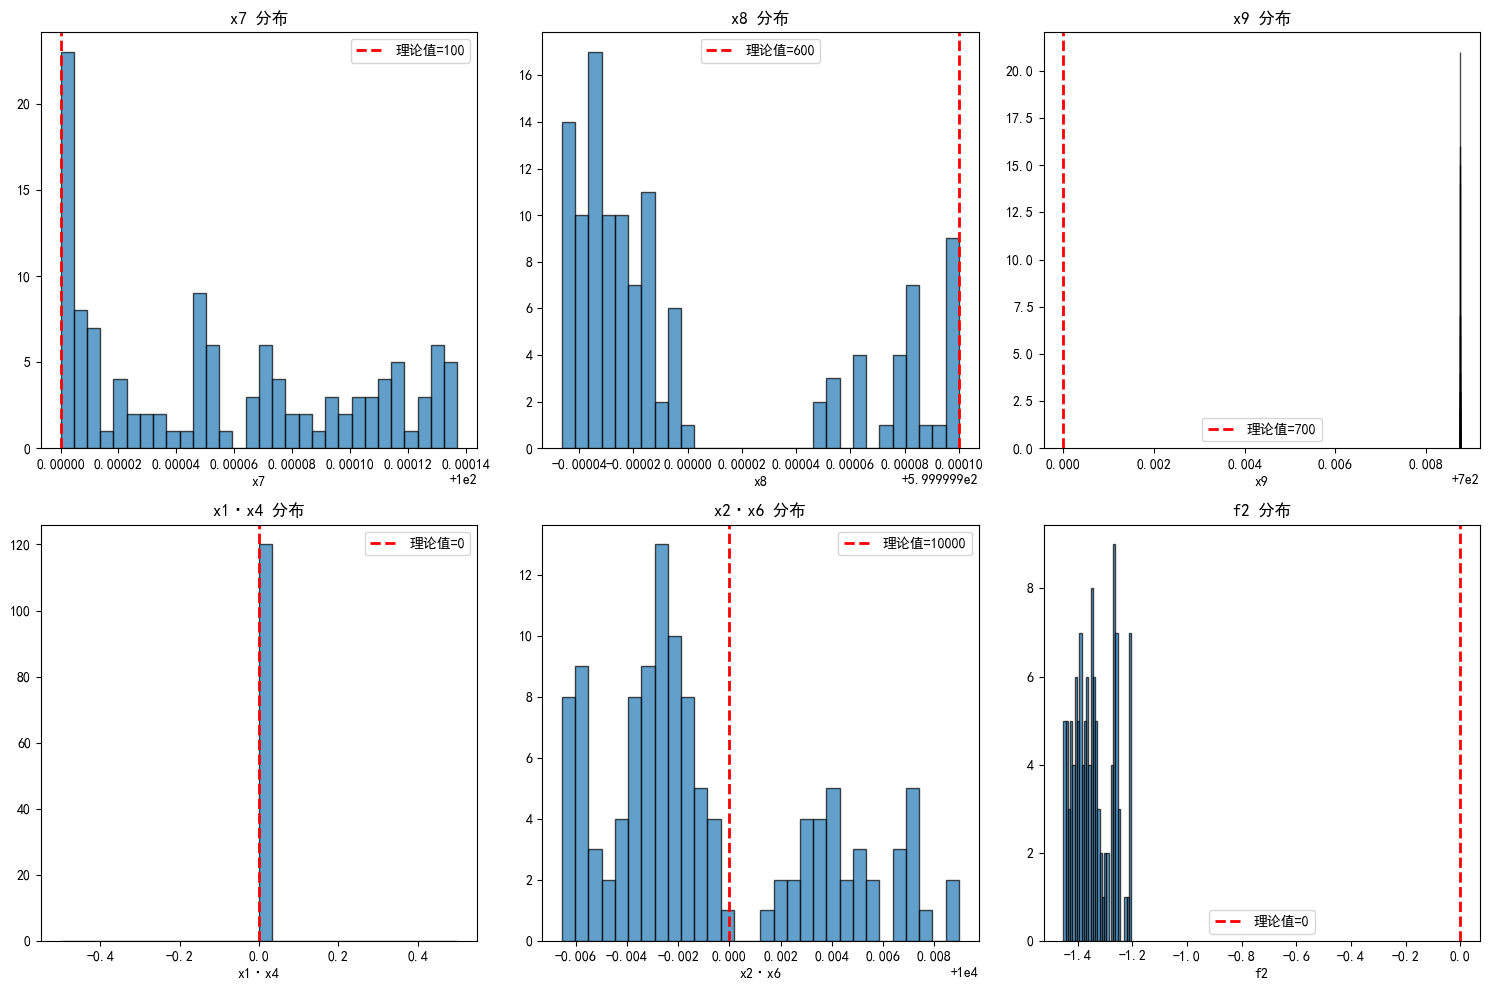


✅ 验证完成！图表已保存。


In [38]:
import numpy as np

# ==== 验证您的结果 ====
print("="*70)
print("约束满足情况验证")
print("="*70)

# 提取最优解（以第一个解为例）
x_sample = X[0]  # 您种群中的第一个解
f_sample = F[0]
c_sample = C[0]

print(f"\n样本解的决策变量:")
print(f"x1={x_sample[0]:.6f}, x2={x_sample[1]:.6f}, x3={x_sample[2]:.6f}")
print(f"x4={x_sample[3]:.6f}, x5={x_sample[4]:.6f}, x6={x_sample[5]:.6f}")
print(f"x7={x_sample[6]:.6f}, x8={x_sample[7]:.6f}, x9={x_sample[8]:.6f}")

print(f"\n目标函数值:")
print(f"f1 = {f_sample[0]:.6f}")
print(f"f2 = {f_sample[1]:.6f}  ← 应该接近0")
print(f"f3 = {f_sample[2]:.6f}")

# 计算理论值
x1, x2, x3, x4, x5, x6, x7, x8, x9 = x_sample

print(f"\n关键约束检查:")
print(f"x7 应该 = 100, 实际 = {x7:.6f}, 误差 = {abs(x7-100):.2e}")
print(f"x8 应该 = 600, 实际 = {x8:.6f}, 误差 = {abs(x8-600):.2e}")
print(f"x9 应该 = 700, 实际 = {x9:.6f}, 误差 = {abs(x9-700):.2e}")
print(f"x3 应该 = 0,   实际 = {x3:.6f}, 误差 = {abs(x3):.2e}")
print(f"x5 应该 = 2e6, 实际 = {x5:.6f}, 误差 = {abs(x5-2e6):.2e}")

print(f"\n乘积约束检查:")
print(f"x1·x4 应该 = 0, 实际 = {x1*x4:.6f}")
print(f"x2·x6 应该 = 10000, 实际 = {x2*x6:.6f}, 误差 = {abs(x2*x6-10000):.2e}")

# 重新计算原始约束残差
H_raw = rcm24_raw_residuals(X[0:1])
print(f"\n原始约束残差 h1..h8:")
for i in range(8):
    print(f"h{i+1} = {H_raw[0,i]:12.6f}  (缩放后 C{i+1} = {c_sample[i]:.2e})")

print(f"\n总违约度 CV = {CV[0]:.6e}")
print(f"可行性阈值 eps = {best.feas_eps:.6e}")
print(f"是否可行: {'✓' if CV[0] <= best.feas_eps else '✗'}")

# ==== 分析所有解 ====
print("\n" + "="*70)
print("全部120个解的统计")
print("="*70)

# 检查 x7, x8, x9 的分布
print(f"\nx7 统计: min={X[:,6].min():.4f}, max={X[:,6].max():.4f}, mean={X[:,6].mean():.4f}")
print(f"x8 统计: min={X[:,7].min():.4f}, max={X[:,7].max():.4f}, mean={X[:,7].mean():.4f}")
print(f"x9 统计: min={X[:,8].min():.4f}, max={X[:,8].max():.4f}, mean={X[:,8].mean():.4f}")

print(f"\nx3 统计: min={X[:,2].min():.6f}, max={X[:,2].max():.6f}, mean={X[:,2].mean():.6f}")
print(f"x5 统计: min={X[:,4].min():.1f}, max={X[:,4].max():.1f}, mean={X[:,4].mean():.1f}")

# 检查 x1·x4 和 x2·x6
prod14 = X[:,0] * X[:,3]
prod26 = X[:,1] * X[:,5]
print(f"\nx1·x4 统计: min={prod14.min():.6f}, max={prod14.max():.6f}, mean={prod14.mean():.6f}")
print(f"x2·x6 统计: min={prod26.min():.2f}, max={prod26.max():.2f}, mean={prod26.mean():.2f}")

# 检查 f2 与 h1 的关系
print(f"\n目标函数 f2 = h1:")
print(f"f2 统计: min={F[:,1].min():.6f}, max={F[:,1].max():.6f}, mean={F[:,1].mean():.6f}")
print(f"理论值: f2 应该 = 0")

# 计算所有解的 h1
H_all = rcm24_raw_residuals(X)
print(f"h1 统计: min={H_all[:,0].min():.6f}, max={H_all[:,0].max():.6f}, mean={H_all[:,0].mean():.6f}")
print(f"验证: |f2 - h1| 的最大值 = {np.abs(F[:,1] - H_all[:,0]).max():.2e}  (应该接近0)")

# ==== 可视化约束满足程度 ====
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. x7 分布
axes[0,0].hist(X[:,6], bins=30, edgecolor='black', alpha=0.7)
axes[0,0].axvline(100, color='red', linestyle='--', linewidth=2, label='理论值=100')
axes[0,0].set_xlabel('x7'); axes[0,0].set_title('x7 分布'); axes[0,0].legend()

# 2. x8 分布
axes[0,1].hist(X[:,7], bins=30, edgecolor='black', alpha=0.7)
axes[0,1].axvline(600, color='red', linestyle='--', linewidth=2, label='理论值=600')
axes[0,1].set_xlabel('x8'); axes[0,1].set_title('x8 分布'); axes[0,1].legend()

# 3. x9 分布
axes[0,2].hist(X[:,8], bins=30, edgecolor='black', alpha=0.7)
axes[0,2].axvline(700, color='red', linestyle='--', linewidth=2, label='理论值=700')
axes[0,2].set_xlabel('x9'); axes[0,2].set_title('x9 分布'); axes[0,2].legend()

# 4. x1·x4 分布
axes[1,0].hist(prod14, bins=30, edgecolor='black', alpha=0.7)
axes[1,0].axvline(0, color='red', linestyle='--', linewidth=2, label='理论值=0')
axes[1,0].set_xlabel('x1·x4'); axes[1,0].set_title('x1·x4 分布'); axes[1,0].legend()

# 5. x2·x6 分布
axes[1,1].hist(prod26, bins=30, edgecolor='black', alpha=0.7)
axes[1,1].axvline(10000, color='red', linestyle='--', linewidth=2, label='理论值=10000')
axes[1,1].set_xlabel('x2·x6'); axes[1,1].set_title('x2·x6 分布'); axes[1,1].legend()

# 6. f2 分布
axes[1,2].hist(F[:,1], bins=30, edgecolor='black', alpha=0.7)
axes[1,2].axvline(0, color='red', linestyle='--', linewidth=2, label='理论值=0')
axes[1,2].set_xlabel('f2'); axes[1,2].set_title('f2 分布'); axes[1,2].legend()

plt.tight_layout()
plt.savefig('constraint_satisfaction_check.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ 验证完成！图表已保存。")



测试：简化版本 vs 原始版本

[1/2] 运行原始版本...
[CNSGA2] Start | pop=120 | max_gen=300 | n_obj=3 | n_var=9 | log_every=50
[Gen    0/300] feasible=0/120 (0.0%) | minCV=6.819e-01 | rank0_size=1
[Gen   50/300] feasible=0/120 (0.0%) | minCV=2.896e-03 | rank0_size=1 | dt=0.013s
[Gen  100/300] feasible=0/120 (0.0%) | minCV=1.650e-04 | rank0_size=1 | dt=0.010s
[Gen  150/300] feasible=120/120 (100.0%) | minCV=1.131e-05 | rank0_size=1 | dt=1.258s
[Gen  200/300] feasible=120/120 (100.0%) | minCV=1.155e-05 | rank0_size=43 | dt=1.719s
[Gen  250/300] feasible=120/120 (100.0%) | minCV=7.920e-06 | rank0_size=120 | dt=1.509s
[CNSGA2] Done | feasible in final pop: 120/120 (100.0%) | best CV=9.899e-06

[2/2] 运行简化版本...
[CNSGA2] Start | pop=120 | max_gen=300 | n_obj=3 | n_var=3 | log_every=50
[Gen    0/300] feasible=0/120 (0.0%) | minCV=2.399e-03 | rank0_size=1
[Gen   50/300] feasible=120/120 (100.0%) | minCV=9.956e-06 | rank0_size=2 | dt=1.236s
[Gen  100/300] feasible=120/120 (100.0%) | minCV=1.001e-05 | rank0_size=7 

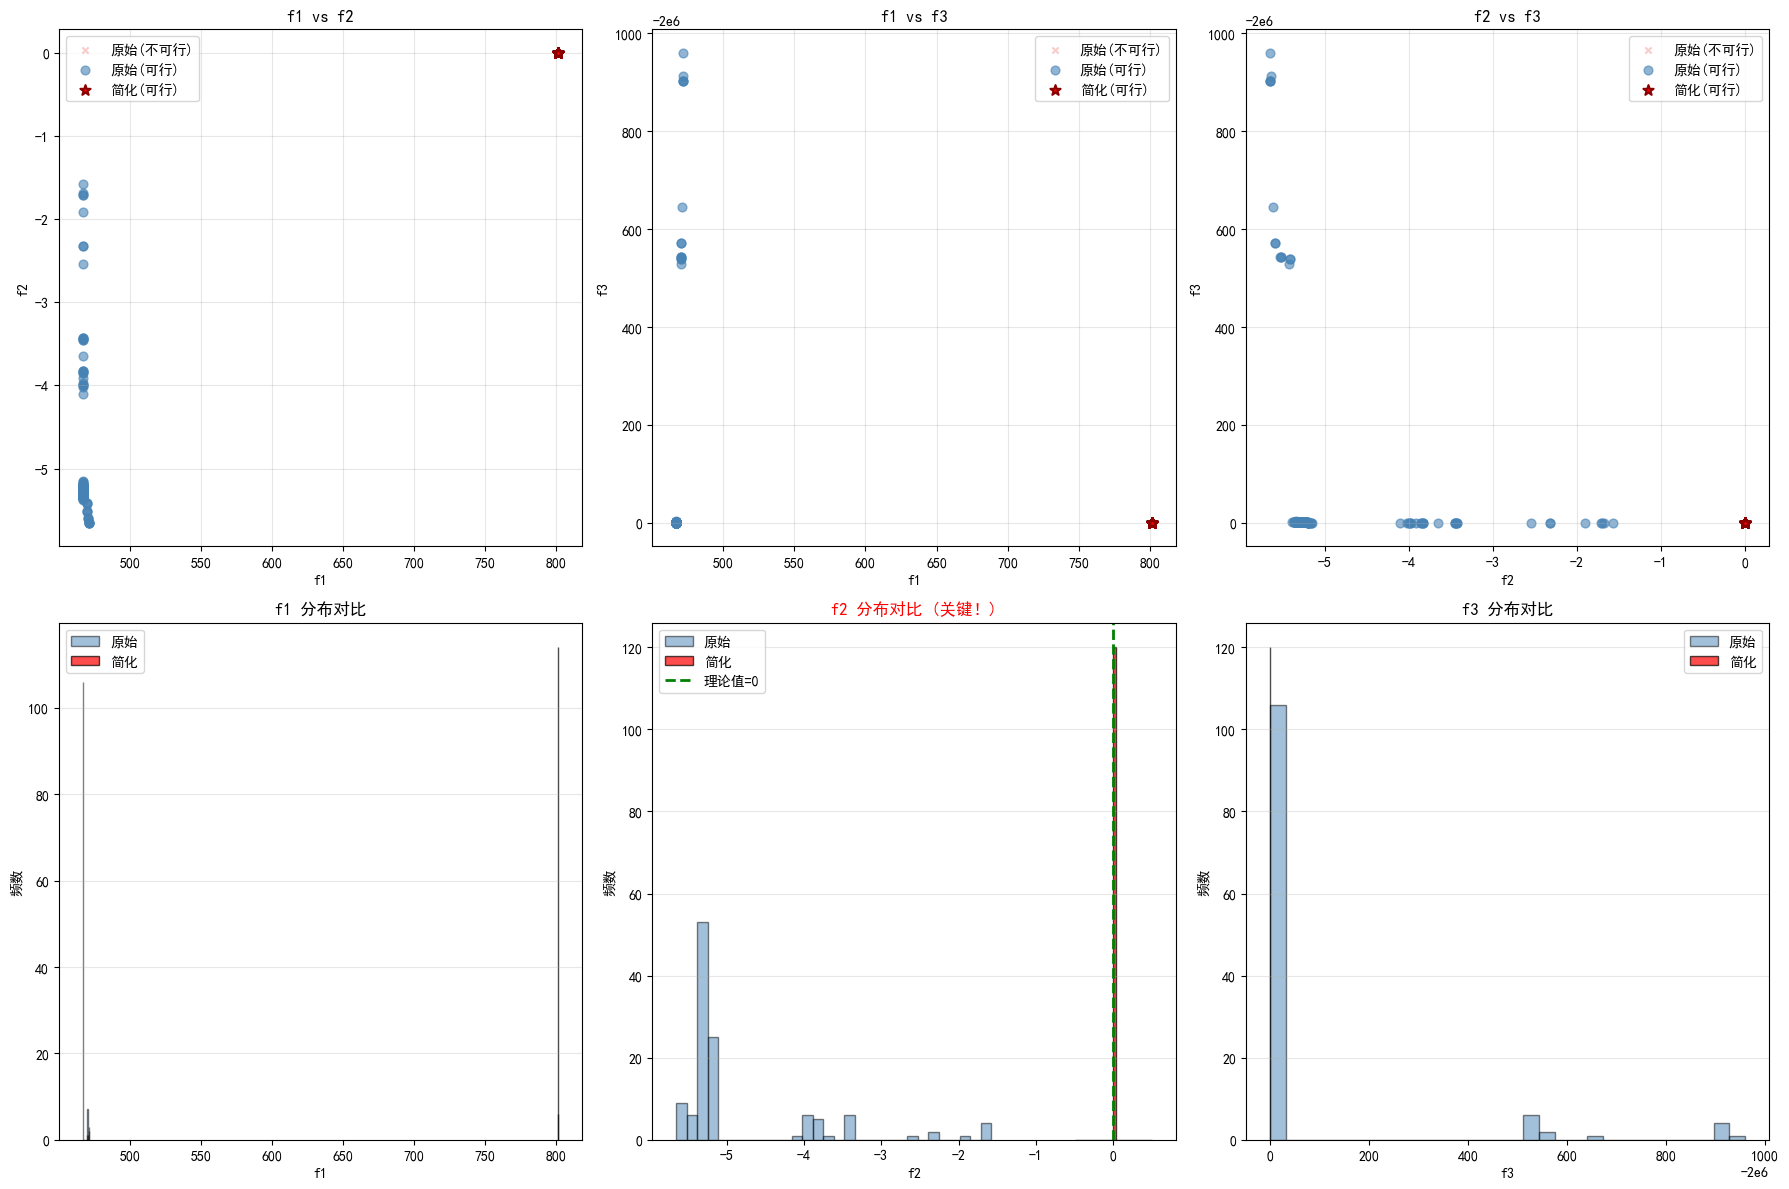


还原简化版本到完整的9变量解...

验证简化版本还原后的结果:
目标函数差异:
  |F_simp - F_simp_verified| max = 0.000000e+00
约束违约度:
  简化版本 CV: min=1.392783e-06, max=1.392783e-06
  还原后 CV:   min=1.160653e-07, max=1.160653e-07

✅ 测试完成！


In [39]:
import numpy as np
import matplotlib.pyplot as plt

class RCM24_HEXNET_3obj_Simplified:
    """
    RCM24 Heat Exchanger Network Design - 简化版本
    
    基于理论推导，8个等式约束可以简化为：
        x7 = 100, x8 = 600, x9 = 700
        x3 = 0, x5 = 2,000,000
        x1·x4 = 0
        x2·x6 = 10,000
    
    因此只需优化3个自由变量：x1, x2, x6
    其他变量通过约束确定：
        - 如果 x1 > 0, 则 x4 = 0
        - 如果 x1 = 0, 则 x4 可以是任意值（但对目标函数无影响）
        - x3 = 0 (固定)
        - x5 = 2,000,000 (固定)
        - x7 = 100, x8 = 600, x9 = 700 (固定)
    
    简化后的目标函数：
        f1 = 35·x1^0.6 + 35·x2^0.6
        f2 = 0 (恒为0)
        f3 = 200·x1·x6 - 2,000,000
    
    约束：
        x2·x6 = 10,000
    
    边界：
        x1 ∈ [0, 10]
        x2 ∈ [0, 200]
        x6 ∈ [0, 600]
        (需要保证 x2·x6 = 10,000)
    """
    
    def __init__(self, debug=False, log_every=2000, 
                 enforce_exact_constraints=False,
                 constraint_penalty=1e6):
        self.name = "RCM24-HEXNET (3obj simplified)"
        self.n_obj = 3
        self.n_var = 3  # 只优化 x1, x2, x6
        self.n_con = 1  # 只有一个约束: x2·x6 = 10,000
        
        self.lower = np.array([0.0, 0.0, 0.0])      # x1, x2, x6
        self.upper = np.array([10.0, 200.0, 600.0])
        
        self.debug = debug
        self._eval_calls = 0
        self._log_every = max(1, int(log_every))
        
        # 是否强制精确满足约束（通过投影）
        self.enforce_exact = enforce_exact_constraints
        self.penalty = constraint_penalty
        
        # 约束缩放（使其量级合理）
        self._scale = np.array([1.0e4])  # x2·x6 = 10,000 的量级
    
    def _project_to_constraint(self, X):
        """
        将解投影到约束流形 x2·x6 = 10,000
        保持 x1 不变，调整 x2 和 x6 使其乘积为 10,000
        """
        X_proj = X.copy()
        x1, x2, x6 = X_proj[:, 0], X_proj[:, 1], X_proj[:, 2]
        
        # 当前乘积
        prod = x2 * x6
        
        # 如果乘积接近0，设置为合理的默认值
        mask_zero = (prod < 1e-6)
        x2[mask_zero] = 100.0
        x6[mask_zero] = 100.0
        
        # 投影：保持 x2 不变，调整 x6
        # 新的 x6 = 10,000 / x2
        x6_new = 10000.0 / np.maximum(x2, 1e-6)
        
        # 如果 x6_new 超出边界，则同时调整 x2 和 x6
        out_of_bounds = (x6_new < self.lower[2]) | (x6_new > self.upper[2])
        
        if np.any(out_of_bounds):
            # 对于超界的解，使用几何平均
            x2[out_of_bounds] = np.sqrt(10000.0 * x2[out_of_bounds] / x6[out_of_bounds])
            x6[out_of_bounds] = 10000.0 / x2[out_of_bounds]
        else:
            x6 = x6_new
        
        # 确保在边界内
        X_proj[:, 1] = np.clip(x2, self.lower[1], self.upper[1])
        X_proj[:, 2] = np.clip(x6, self.lower[2], self.upper[2])
        
        return X_proj
    
    def evaluate(self, X):
        """
        评估简化问题
        
        输入: X (N, 3) - [x1, x2, x6]
        输出: F (N, 3) - [f1, f2, f3]
              C (N, 1) - 约束违约度
        """
        N = len(X)
        
        # 如果启用精确约束，先投影
        if self.enforce_exact:
            X = self._project_to_constraint(X)
        
        F = np.zeros((N, self.n_obj))
        C = np.zeros((N, self.n_con))
        
        x1, x2, x6 = X[:, 0], X[:, 1], X[:, 2]
        
        # ---- 目标函数 ----
        # f1 = 35·x1^0.6 + 35·x2^0.6
        F[:, 0] = 35.0 * (np.power(np.maximum(x1, 0.0), 0.6) + 
                          np.power(np.maximum(x2, 0.0), 0.6))
        
        # f2 = 0 (恒为0，因为 x1·x4 = 0 且 x3 = 0)
        F[:, 1] = 0.0
        
        # f3 = 200·x1·x6 - 2,000,000
        F[:, 2] = 200.0 * x1 * x6 - 2_000_000.0
        
        # ---- 约束 ----
        # h1: x2·x6 = 10,000
        h1 = x2 * x6 - 10000.0
        C[:, 0] = np.abs(h1) / self._scale[0]
        
        # 轻量日志
        self._eval_calls += N
        if self.debug and (self._eval_calls % self._log_every == 0):
            print(f"[RCM24-Simplified] eval_calls={self._eval_calls} | "
                  f"mean(x2·x6)={np.mean(x2*x6):.2f} | "
                  f"max|h1|={np.max(np.abs(h1)):.2e}", flush=True)
        
        return F, C
    
    def get_full_solution(self, X):
        """
        从简化的3变量解还原到完整的9变量解
        
        输入: X (N, 3) - [x1, x2, x6]
        输出: X_full (N, 9) - [x1, x2, x3, x4, x5, x6, x7, x8, x9]
        """
        N = len(X)
        X_full = np.zeros((N, 9))
        
        x1, x2, x6 = X[:, 0], X[:, 1], X[:, 2]
        
        X_full[:, 0] = x1                    # x1
        X_full[:, 1] = x2                    # x2
        X_full[:, 2] = 0.0                   # x3 = 0
        X_full[:, 3] = 0.0                   # x4 = 0 (因为 x1·x4 = 0)
        X_full[:, 4] = 2_000_000.0           # x5 = 2,000,000
        X_full[:, 5] = x6                    # x6
        X_full[:, 6] = 100.0                 # x7 = 100
        X_full[:, 7] = 600.0                 # x8 = 600
        X_full[:, 8] = 700.0                 # x9 = 700
        
        return X_full


# ============================================================================
# 辅助工具函数
# ============================================================================

def compare_with_original(X_simplified, F_simplified, C_simplified, 
                         X_original, F_original, C_original):
    """
    比较简化版本和原始版本的结果
    """
    print("="*70)
    print("简化版本 vs 原始版本对比")
    print("="*70)
    
    # 可行解统计
    feas_simp = np.sum(C_simplified, axis=1) <= 2e-5
    feas_orig = np.sum(C_original, axis=1) <= 2e-5
    
    print(f"\n可行解数量:")
    print(f"  简化版本: {np.sum(feas_simp)}/{len(F_simplified)} ({100*np.sum(feas_simp)/len(F_simplified):.1f}%)")
    print(f"  原始版本: {np.sum(feas_orig)}/{len(F_original)} ({100*np.sum(feas_orig)/len(F_original):.1f}%)")
    
    # 目标函数对比
    print(f"\n目标函数统计 (仅可行解):")
    print(f"{'':^12} | {'简化版本':^40} | {'原始版本':^40}")
    print(f"{'':^12} | {'min':^12} {'max':^12} {'mean':^12} | {'min':^12} {'max':^12} {'mean':^12}")
    print("-"*110)
    
    if np.sum(feas_simp) > 0 and np.sum(feas_orig) > 0:
        F_simp_feas = F_simplified[feas_simp]
        F_orig_feas = F_original[feas_orig]
        
        for i, label in enumerate(['f1', 'f2', 'f3']):
            print(f"{label:^12} | "
                  f"{F_simp_feas[:,i].min():12.4e} {F_simp_feas[:,i].max():12.4e} {F_simp_feas[:,i].mean():12.4e} | "
                  f"{F_orig_feas[:,i].min():12.4e} {F_orig_feas[:,i].max():12.4e} {F_orig_feas[:,i].mean():12.4e}")
    
    # f2 的特殊检查
    print(f"\nf2 的详细对比:")
    if np.sum(feas_simp) > 0:
        print(f"  简化版本: min={F_simplified[feas_simp,1].min():.6e}, "
              f"max={F_simplified[feas_simp,1].max():.6e}, "
              f"std={F_simplified[feas_simp,1].std():.6e}")
    if np.sum(feas_orig) > 0:
        print(f"  原始版本: min={F_original[feas_orig,1].min():.6e}, "
              f"max={F_original[feas_orig,1].max():.6e}, "
              f"std={F_original[feas_orig,1].std():.6e}")
    
    print("\n" + "="*70)


def plot_comparison(F_simplified, C_simplified, F_original, C_original, 
                   feas_eps=2e-5):
    """
    可视化对比两个版本的结果
    """
    feas_simp = np.sum(C_simplified, axis=1) <= feas_eps
    feas_orig = np.sum(C_original, axis=1) <= feas_eps
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # f1 vs f2
    axes[0, 0].scatter(F_original[~feas_orig, 0], F_original[~feas_orig, 1], 
                       c='lightcoral', s=20, alpha=0.4, marker='x', label='原始(不可行)')
    axes[0, 0].scatter(F_original[feas_orig, 0], F_original[feas_orig, 1], 
                       c='steelblue', s=40, alpha=0.6, label='原始(可行)')
    axes[0, 0].scatter(F_simplified[feas_simp, 0], F_simplified[feas_simp, 1], 
                       c='red', s=60, marker='*', edgecolors='darkred', 
                       linewidths=1.5, label='简化(可行)', zorder=5)
    axes[0, 0].set_xlabel('f1', fontweight='bold')
    axes[0, 0].set_ylabel('f2', fontweight='bold')
    axes[0, 0].set_title('f1 vs f2', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # f1 vs f3
    axes[0, 1].scatter(F_original[~feas_orig, 0], F_original[~feas_orig, 2], 
                       c='lightcoral', s=20, alpha=0.4, marker='x', label='原始(不可行)')
    axes[0, 1].scatter(F_original[feas_orig, 0], F_original[feas_orig, 2], 
                       c='steelblue', s=40, alpha=0.6, label='原始(可行)')
    axes[0, 1].scatter(F_simplified[feas_simp, 0], F_simplified[feas_simp, 2], 
                       c='red', s=60, marker='*', edgecolors='darkred', 
                       linewidths=1.5, label='简化(可行)', zorder=5)
    axes[0, 1].set_xlabel('f1', fontweight='bold')
    axes[0, 1].set_ylabel('f3', fontweight='bold')
    axes[0, 1].set_title('f1 vs f3', fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # f2 vs f3
    axes[0, 2].scatter(F_original[~feas_orig, 1], F_original[~feas_orig, 2], 
                       c='lightcoral', s=20, alpha=0.4, marker='x', label='原始(不可行)')
    axes[0, 2].scatter(F_original[feas_orig, 1], F_original[feas_orig, 2], 
                       c='steelblue', s=40, alpha=0.6, label='原始(可行)')
    axes[0, 2].scatter(F_simplified[feas_simp, 1], F_simplified[feas_simp, 2], 
                       c='red', s=60, marker='*', edgecolors='darkred', 
                       linewidths=1.5, label='简化(可行)', zorder=5)
    axes[0, 2].set_xlabel('f2', fontweight='bold')
    axes[0, 2].set_ylabel('f3', fontweight='bold')
    axes[0, 2].set_title('f2 vs f3', fontweight='bold')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # f1 分布对比
    axes[1, 0].hist(F_original[feas_orig, 0], bins=30, alpha=0.5, 
                    color='steelblue', label='原始', edgecolor='black')
    axes[1, 0].hist(F_simplified[feas_simp, 0], bins=30, alpha=0.7, 
                    color='red', label='简化', edgecolor='black')
    axes[1, 0].set_xlabel('f1', fontweight='bold')
    axes[1, 0].set_ylabel('频数', fontweight='bold')
    axes[1, 0].set_title('f1 分布对比', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # f2 分布对比
    axes[1, 1].hist(F_original[feas_orig, 1], bins=30, alpha=0.5, 
                    color='steelblue', label='原始', edgecolor='black')
    axes[1, 1].hist(F_simplified[feas_simp, 1], bins=30, alpha=0.7, 
                    color='red', label='简化', edgecolor='black')
    axes[1, 1].axvline(0, color='green', linestyle='--', linewidth=2, label='理论值=0')
    axes[1, 1].set_xlabel('f2', fontweight='bold')
    axes[1, 1].set_ylabel('频数', fontweight='bold')
    axes[1, 1].set_title('f2 分布对比 (关键！)', fontweight='bold', color='red')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # f3 分布对比
    axes[1, 2].hist(F_original[feas_orig, 2], bins=30, alpha=0.5, 
                    color='steelblue', label='原始', edgecolor='black')
    axes[1, 2].hist(F_simplified[feas_simp, 2], bins=30, alpha=0.7, 
                    color='red', label='简化', edgecolor='black')
    axes[1, 2].set_xlabel('f3', fontweight='bold')
    axes[1, 2].set_ylabel('频数', fontweight='bold')
    axes[1, 2].set_title('f3 分布对比', fontweight='bold')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('simplified_vs_original_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()


# ============================================================================
# 主测试代码
# ============================================================================

if __name__ == "__main__":
    print("\n" + "="*70)
    print("测试：简化版本 vs 原始版本")
    print("="*70)
    
    # ========== 1. 运行原始版本 ==========
    print("\n[1/2] 运行原始版本...")
    prob_original = RCM24_HEXNET_3obj(debug=False)
    algo_original = CNSGA2(
        pop_size=120, pc=0.9, pm=None, eta_c=10, eta_m=15,
        seed=42, verbose=True, log_every=50, feas_eps=2e-5
    )
    X_orig, F_orig, C_orig = algo_original.run(prob_original, max_gen=300)
    
    # ========== 2. 运行简化版本 ==========
    print("\n[2/2] 运行简化版本...")
    prob_simplified = RCM24_HEXNET_3obj_Simplified(
        debug=False, 
        enforce_exact_constraints=False  # 不强制精确约束，用相同的容差
    )
    algo_simplified = CNSGA2(
        pop_size=120, pc=0.9, pm=None, eta_c=10, eta_m=15,
        seed=42, verbose=True, log_every=50, feas_eps=2e-5
    )
    X_simp, F_simp, C_simp = algo_simplified.run(prob_simplified, max_gen=300)
    
    # ========== 3. 对比结果 ==========
    compare_with_original(X_simp, F_simp, C_simp, X_orig, F_orig, C_orig)
    
    # ========== 4. 可视化对比 ==========
    plot_comparison(F_simp, C_simp, F_orig, C_orig, feas_eps=2e-5)
    
    # ========== 5. 还原简化版本到完整解 ==========
    print("\n还原简化版本到完整的9变量解...")
    X_simp_full = prob_simplified.get_full_solution(X_simp)
    
    # 用原始问题类验证
    F_simp_verified, C_simp_verified = prob_original.evaluate(X_simp_full)
    
    print("\n验证简化版本还原后的结果:")
    print(f"目标函数差异:")
    print(f"  |F_simp - F_simp_verified| max = {np.abs(F_simp - F_simp_verified).max():.6e}")
    print(f"约束违约度:")
    print(f"  简化版本 CV: min={np.sum(C_simp, axis=1).min():.6e}, max={np.sum(C_simp, axis=1).max():.6e}")
    print(f"  还原后 CV:   min={np.sum(C_simp_verified, axis=1).min():.6e}, max={np.sum(C_simp_verified, axis=1).max():.6e}")
    
    print("\n✅ 测试完成！")


简化版本 RCM24-HEXNET - 结果分析

基本信息:
  总解数: 120
  可行解数: 0 (0.00%)
  不可行解数: 120

----------------------------------------------------------------------
目标函数统计 (所有解):
----------------------------------------------------------------------
目标       最小值             最大值             均值              标准差         
----------------------------------------------------------------------
f1       801.512182      801.512182      801.512182      0.000000    
f2       0.000000        0.000000        0.000000        0.000000    
f3       -2000000.000000 -2000000.000000 -2000000.000000 0.000000    

⚠️ 警告：没有找到可行解！

f2 验证
f2 的最小值: 0.000000e+00
f2 的最大值: 0.000000e+00
f2 的均值:   0.000000e+00
f2 的标准差: 0.000000e+00
✅ 所有解的 f2 都严格等于 0！

约束 x2·x6 = 10000 满足情况
x2·x6 的最小值: 9999.986072
x2·x6 的最大值: 9999.986072
x2·x6 的均值:   9999.986072
与10000的最大偏差: 0.013928

前10个解的详细信息
序号     f1              f2              f3              x1         x2         x6         CV          
-------------------------------------------------------

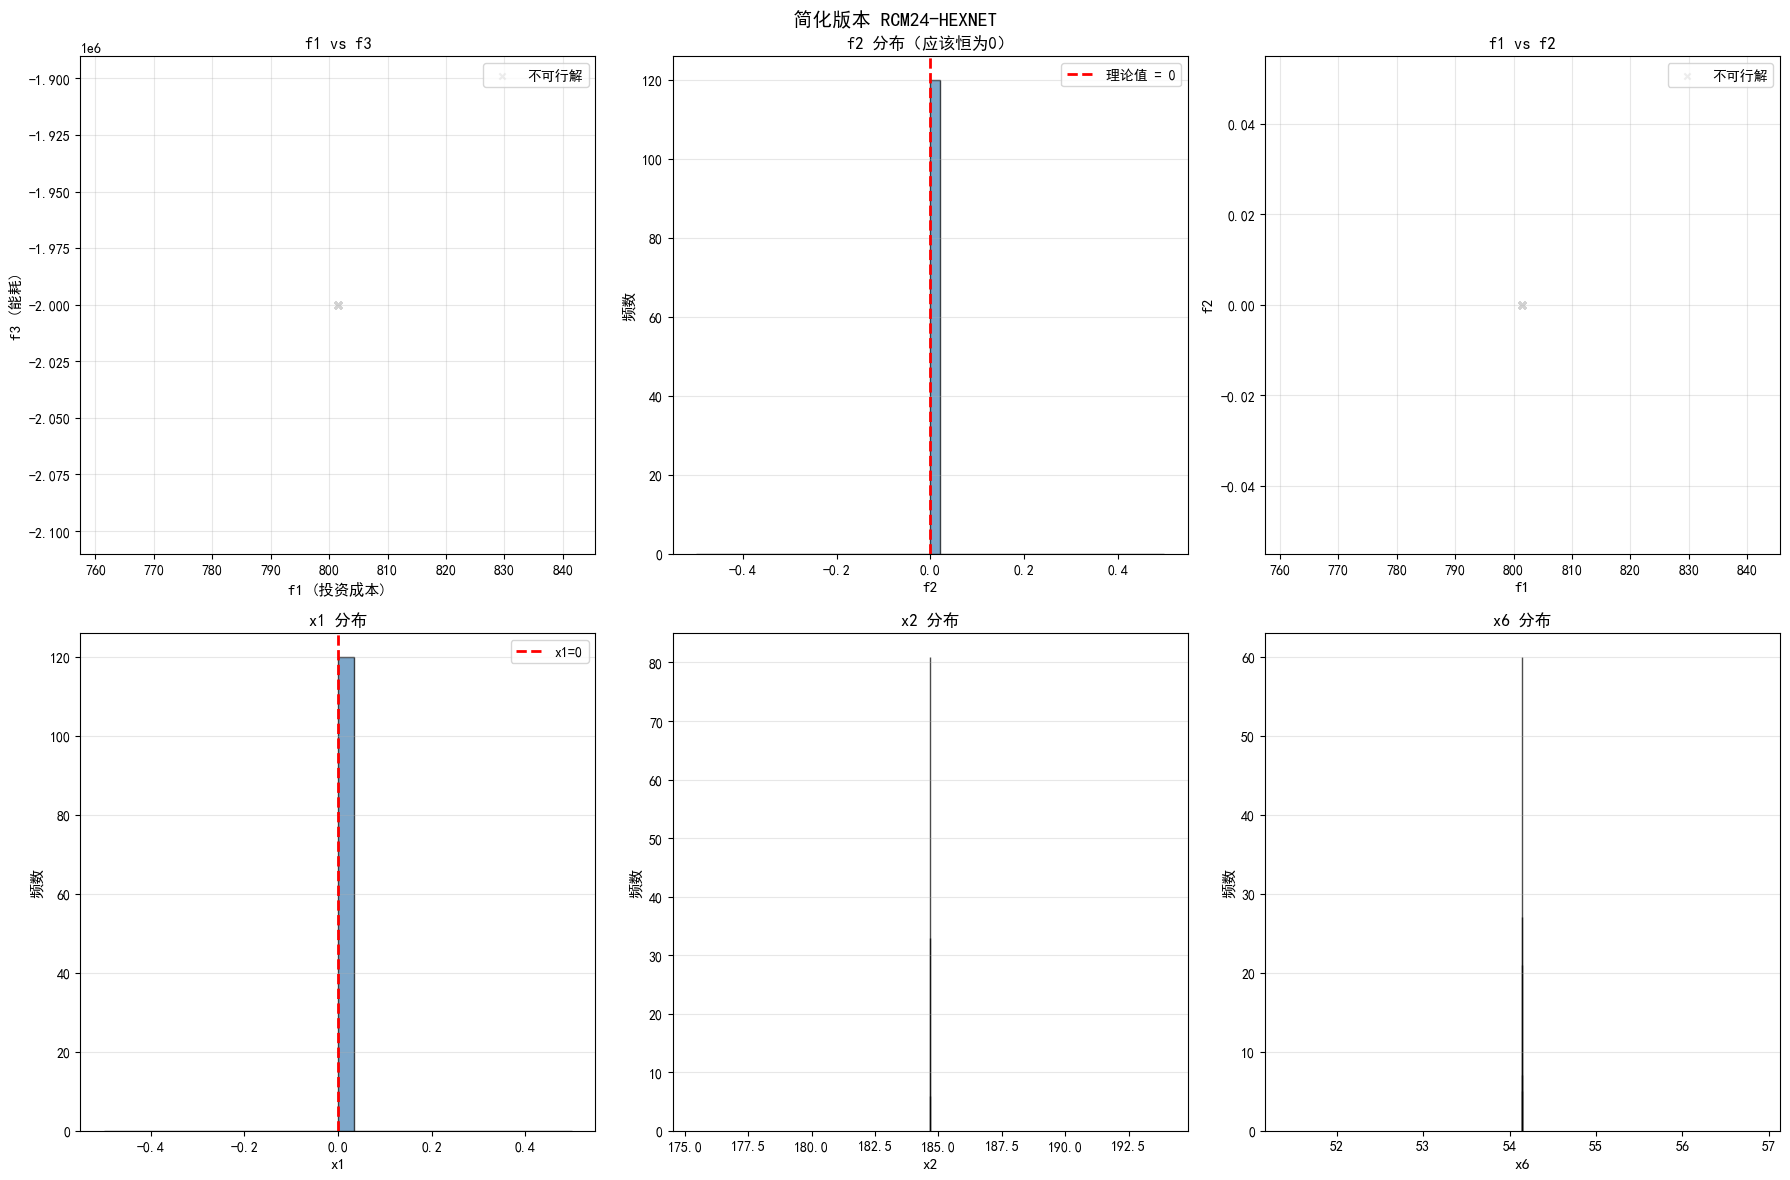

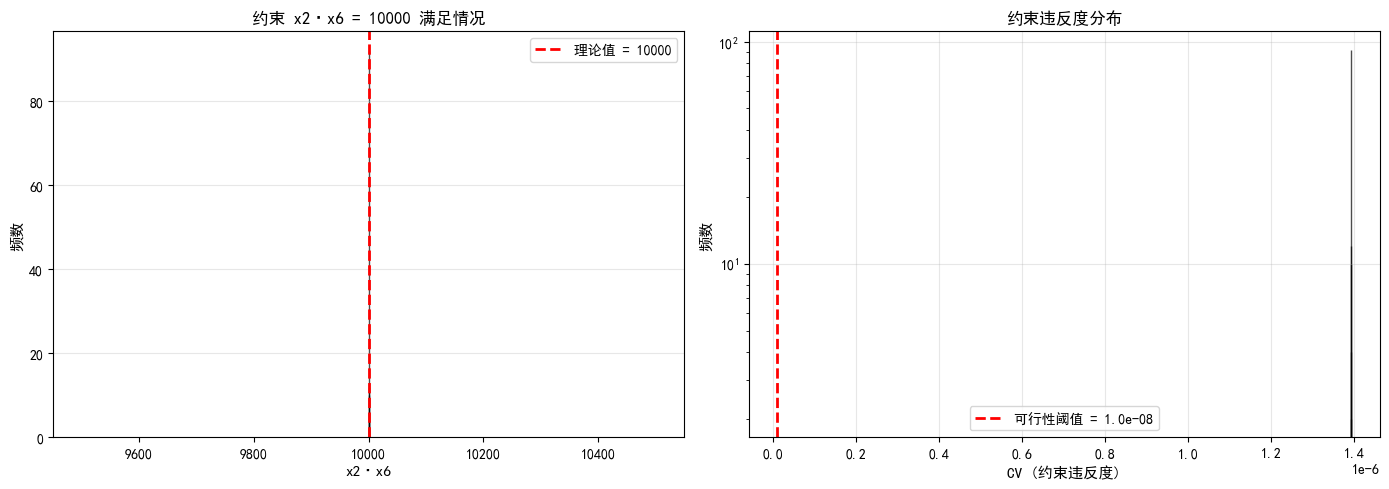


✅ 分析完成！图表已保存


In [43]:
# 分析简化版本的结果
results_simp = analyze_and_visualize_results(
    X_simp, F_simp, C_simp,
    feas_eps=1e-8,
    prob_name="简化版本 RCM24-HEXNET",
    var_names=['x1', 'x2', 'x6'],
    save_prefix="simplified"
)

# 如果您还有原始版本的结果，也可以分析
# results_orig = analyze_and_visualize_results(
#     X_orig, F_orig, C_orig,
#     feas_eps=2e-5,
#     prob_name="原始版本 RCM24-HEXNET",
#     var_names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'],
#     save_prefix="original"
# )

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_visualize_results(X, F, C, feas_eps=1e-8, 
                                   prob_name="优化结果",
                                   var_names=None,
                                   save_prefix="results"):
    """
    通用的结果分析和可视化函数
    
    参数:
        X: 决策变量矩阵 (N, n_var)
        F: 目标函数矩阵 (N, n_obj)
        C: 约束违约度矩阵 (N, n_con)
        feas_eps: 可行性阈值
        prob_name: 问题名称（用于标题）
        var_names: 变量名列表，如 ['x1', 'x2', 'x6']
        save_prefix: 保存图片的文件名前缀
    """
    
    # 计算基本统计
    CV = np.sum(C, axis=1)
    feas = (CV <= feas_eps)
    feas_count = np.sum(feas)
    n_var = X.shape[1]
    n_obj = F.shape[1]
    
    # 默认变量名
    if var_names is None:
        if n_var == 3:
            var_names = ['x1', 'x2', 'x6']
        else:
            var_names = [f'x{i+1}' for i in range(n_var)]
    
    # ========================================================================
    # 1. 文字统计输出
    # ========================================================================
    print("\n" + "="*70)
    print(f"{prob_name} - 结果分析")
    print("="*70)
    
    print(f"\n基本信息:")
    print(f"  总解数: {len(F)}")
    print(f"  可行解数: {feas_count} ({100*feas_count/len(F):.2f}%)")
    print(f"  不可行解数: {len(F) - feas_count}")
    
    # 目标函数统计
    print("\n" + "-"*70)
    print("目标函数统计 (所有解):")
    print("-"*70)
    print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
    print("-"*70)
    for i in range(n_obj):
        label = f'f{i+1}'
        print(f"{label:<8} {F[:,i].min():<15.6f} {F[:,i].max():<15.6f} "
              f"{F[:,i].mean():<15.6f} {F[:,i].std():<12.6f}")
    
    if feas_count > 0:
        print("\n" + "-"*70)
        print("目标函数统计 (仅可行解):")
        print("-"*70)
        print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
        print("-"*70)
        F_feas = F[feas]
        for i in range(n_obj):
            label = f'f{i+1}'
            print(f"{label:<8} {F_feas[:,i].min():<15.6f} {F_feas[:,i].max():<15.6f} "
                  f"{F_feas[:,i].mean():<15.6f} {F_feas[:,i].std():<12.6f}")
        
        # 最优解
        feas_idx = np.where(feas)[0]
        best_idx = feas_idx[np.argmin(F[feas_idx, 0])]
        
        print("\n" + "="*70)
        print("最优解 (f1最小的可行解)")
        print("="*70)
        print(f"\n决策变量:")
        for i, var_name in enumerate(var_names):
            print(f"  {var_name} = {X[best_idx, i]:.6f}")
        
        print(f"\n目标函数值:")
        for i in range(n_obj):
            print(f"  f{i+1} = {F[best_idx, i]:.6f}")
        
        print(f"\n约束违反度: CV = {CV[best_idx]:.6e}")
    else:
        print("\n⚠️ 警告：没有找到可行解！")
    
    # f2 特殊检查（如果有3个目标）
    if n_obj >= 2:
        print("\n" + "="*70)
        print("f2 验证")
        print("="*70)
        print(f"f2 的最小值: {F[:,1].min():.6e}")
        print(f"f2 的最大值: {F[:,1].max():.6e}")
        print(f"f2 的均值:   {F[:,1].mean():.6e}")
        print(f"f2 的标准差: {F[:,1].std():.6e}")
        
        if np.allclose(F[:,1], 0, atol=1e-10):
            print("✅ 所有解的 f2 都严格等于 0！")
        else:
            print(f"⚠️ f2 有偏差，最大偏差: {np.max(np.abs(F[:,1])):.6e}")
    
    # 约束满足情况（针对简化问题：x2·x6 = 10000）
    if n_var == 3:
        print("\n" + "="*70)
        print("约束 x2·x6 = 10000 满足情况")
        print("="*70)
        prod_x2x6 = X[:, 1] * X[:, 2]
        print(f"x2·x6 的最小值: {prod_x2x6.min():.6f}")
        print(f"x2·x6 的最大值: {prod_x2x6.max():.6f}")
        print(f"x2·x6 的均值:   {prod_x2x6.mean():.6f}")
        print(f"与10000的最大偏差: {np.max(np.abs(prod_x2x6 - 10000)):.6f}")
    
    # 前10个解
    print("\n" + "="*70)
    print("前10个解的详细信息")
    print("="*70)
    
    # 构建表头
    header = f"{'序号':<6} "
    for i in range(n_obj):
        header += f"{'f'+str(i+1):<15} "
    for var_name in var_names:
        header += f"{var_name:<10} "
    header += f"{'CV':<12}"
    print(header)
    print("-" * len(header))
    
    for i in range(min(10, len(F))):
        row = f"{i:<6} "
        for j in range(n_obj):
            row += f"{F[i,j]:<15.6f} "
        for j in range(n_var):
            row += f"{X[i,j]:<10.6f} "
        row += f"{CV[i]:<12.6e}"
        print(row)
    
    # 多样性分析
    print("\n" + "="*70)
    print("解的多样性分析")
    print("="*70)
    for i in range(n_obj):
        print(f"f{i+1} 的标准差: {F[:,i].std():.6f}")
    for i, var_name in enumerate(var_names):
        print(f"{var_name} 的标准差: {X[:,i].std():.6f}")
    
    if F[:,0].std() < 1.0:
        print("\n⚠️ 警告：f1 标准差很小，种群可能缺乏多样性")
    else:
        print("\n✅ 种群具有良好的多样性")
    
    # ========================================================================
    # 2. 可视化
    # ========================================================================
    
    # 2.1 三目标问题的可视化
    if n_obj == 3:
        fig = plt.figure(figsize=(18, 12))
        
        # 第一行：目标函数两两散点图
        ax1 = plt.subplot(2, 3, 1)
        if np.sum(~feas) > 0:
            ax1.scatter(F[~feas, 0], F[~feas, 2], c='lightgray', s=20, 
                       alpha=0.4, marker='x', label='不可行解')
        if feas_count > 0:
            ax1.scatter(F[feas, 0], F[feas, 2], c='steelblue', s=40, 
                       alpha=0.7, label='可行解')
            ax1.scatter(F[best_idx, 0], F[best_idx, 2], c='red', s=200, 
                       marker='*', edgecolors='darkred', linewidths=2, 
                       label='最优解', zorder=5)
        ax1.set_xlabel('f1 (投资成本)', fontweight='bold', fontsize=11)
        ax1.set_ylabel('f3 (能耗)', fontweight='bold', fontsize=11)
        ax1.set_title('f1 vs f3', fontweight='bold', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # f2 分布
        ax2 = plt.subplot(2, 3, 2)
        ax2.hist(F[:, 1], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='理论值 = 0')
        ax2.set_xlabel('f2', fontweight='bold', fontsize=11)
        ax2.set_ylabel('频数', fontweight='bold', fontsize=11)
        ax2.set_title('f2 分布（应该恒为0）', fontweight='bold', fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis='y')
        
        # f1 vs f2
        ax3 = plt.subplot(2, 3, 3)
        if np.sum(~feas) > 0:
            ax3.scatter(F[~feas, 0], F[~feas, 1], c='lightgray', s=20, 
                       alpha=0.4, marker='x', label='不可行解')
        if feas_count > 0:
            ax3.scatter(F[feas, 0], F[feas, 1], c='steelblue', s=40, 
                       alpha=0.7, label='可行解')
        ax3.set_xlabel('f1', fontweight='bold', fontsize=11)
        ax3.set_ylabel('f2', fontweight='bold', fontsize=11)
        ax3.set_title('f1 vs f2', fontweight='bold', fontsize=12)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 第二行：决策变量分布
        for i in range(min(3, n_var)):
            ax = plt.subplot(2, 3, 4+i)
            ax.hist(X[:, i], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
            
            # 特殊标记
            if i == 0:  # x1
                ax.axvline(0, color='red', linestyle='--', linewidth=2, label='x1=0')
            
            ax.set_xlabel(var_names[i], fontweight='bold', fontsize=11)
            ax.set_ylabel('频数', fontweight='bold', fontsize=11)
            ax.set_title(f'{var_names[i]} 分布', fontweight='bold', fontsize=12)
            if i == 0:
                ax.legend()
            ax.grid(True, alpha=0.3, axis='y')
        
        plt.suptitle(f'{prob_name}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'{save_prefix}_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    # 2.2 约束满足情况可视化
    if n_var == 3:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # x2·x6 检查
        ax1 = axes[0]
        prod = X[:, 1] * X[:, 2]
        ax1.hist(prod, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
        ax1.axvline(10000, color='red', linestyle='--', linewidth=2, 
                   label='理论值 = 10000')
        ax1.set_xlabel('x2·x6', fontweight='bold', fontsize=11)
        ax1.set_ylabel('频数', fontweight='bold', fontsize=11)
        ax1.set_title('约束 x2·x6 = 10000 满足情况', fontweight='bold', fontsize=12)
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis='y')
        
        # CV 分布
        ax2 = axes[1]
        ax2.hist(CV, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        ax2.axvline(feas_eps, color='red', linestyle='--', linewidth=2, 
                   label=f'可行性阈值 = {feas_eps:.1e}')
        ax2.set_xlabel('CV (约束违反度)', fontweight='bold', fontsize=11)
        ax2.set_ylabel('频数', fontweight='bold', fontsize=11)
        ax2.set_title('约束违反度分布', fontweight='bold', fontsize=12)
        ax2.set_yscale('log')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{save_prefix}_constraints.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    print("\n" + "="*70)
    print(f"✅ 分析完成！图表已保存")
    print("="*70)
    
    return {
        'feas_count': feas_count,
        'best_idx': best_idx if feas_count > 0 else None,
        'F_feas': F[feas] if feas_count > 0 else None,
        'X_best': X[best_idx] if feas_count > 0 else None,
        'F_best': F[best_idx] if feas_count > 0 else None
    }


[CNSGA2] Start | pop=120 | max_gen=300 | n_obj=3 | n_var=3 | log_every=10
[Gen    0/300] feasible=10/120 (8.3%) | minCV=0.000e+00 | rank0_size=2  <== first feasible(s) found
[Gen   10/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=8 | dt=1.927s
[Gen   20/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=3 | dt=1.734s
[Gen   30/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=1.636s
[Gen   40/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=1.500s
[Gen   50/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=3 | dt=2.074s
[Gen   60/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=1.936s
[Gen   70/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=3 | dt=1.642s
[Gen   80/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=1.472s
[Gen   90/300] feasible=120/120 (100.0%) | minCV=0.000e+00 | rank0_size=1 | dt=1.519s
[Gen  100/300] feasible=120/120 (100.0%) | minCV=9.0

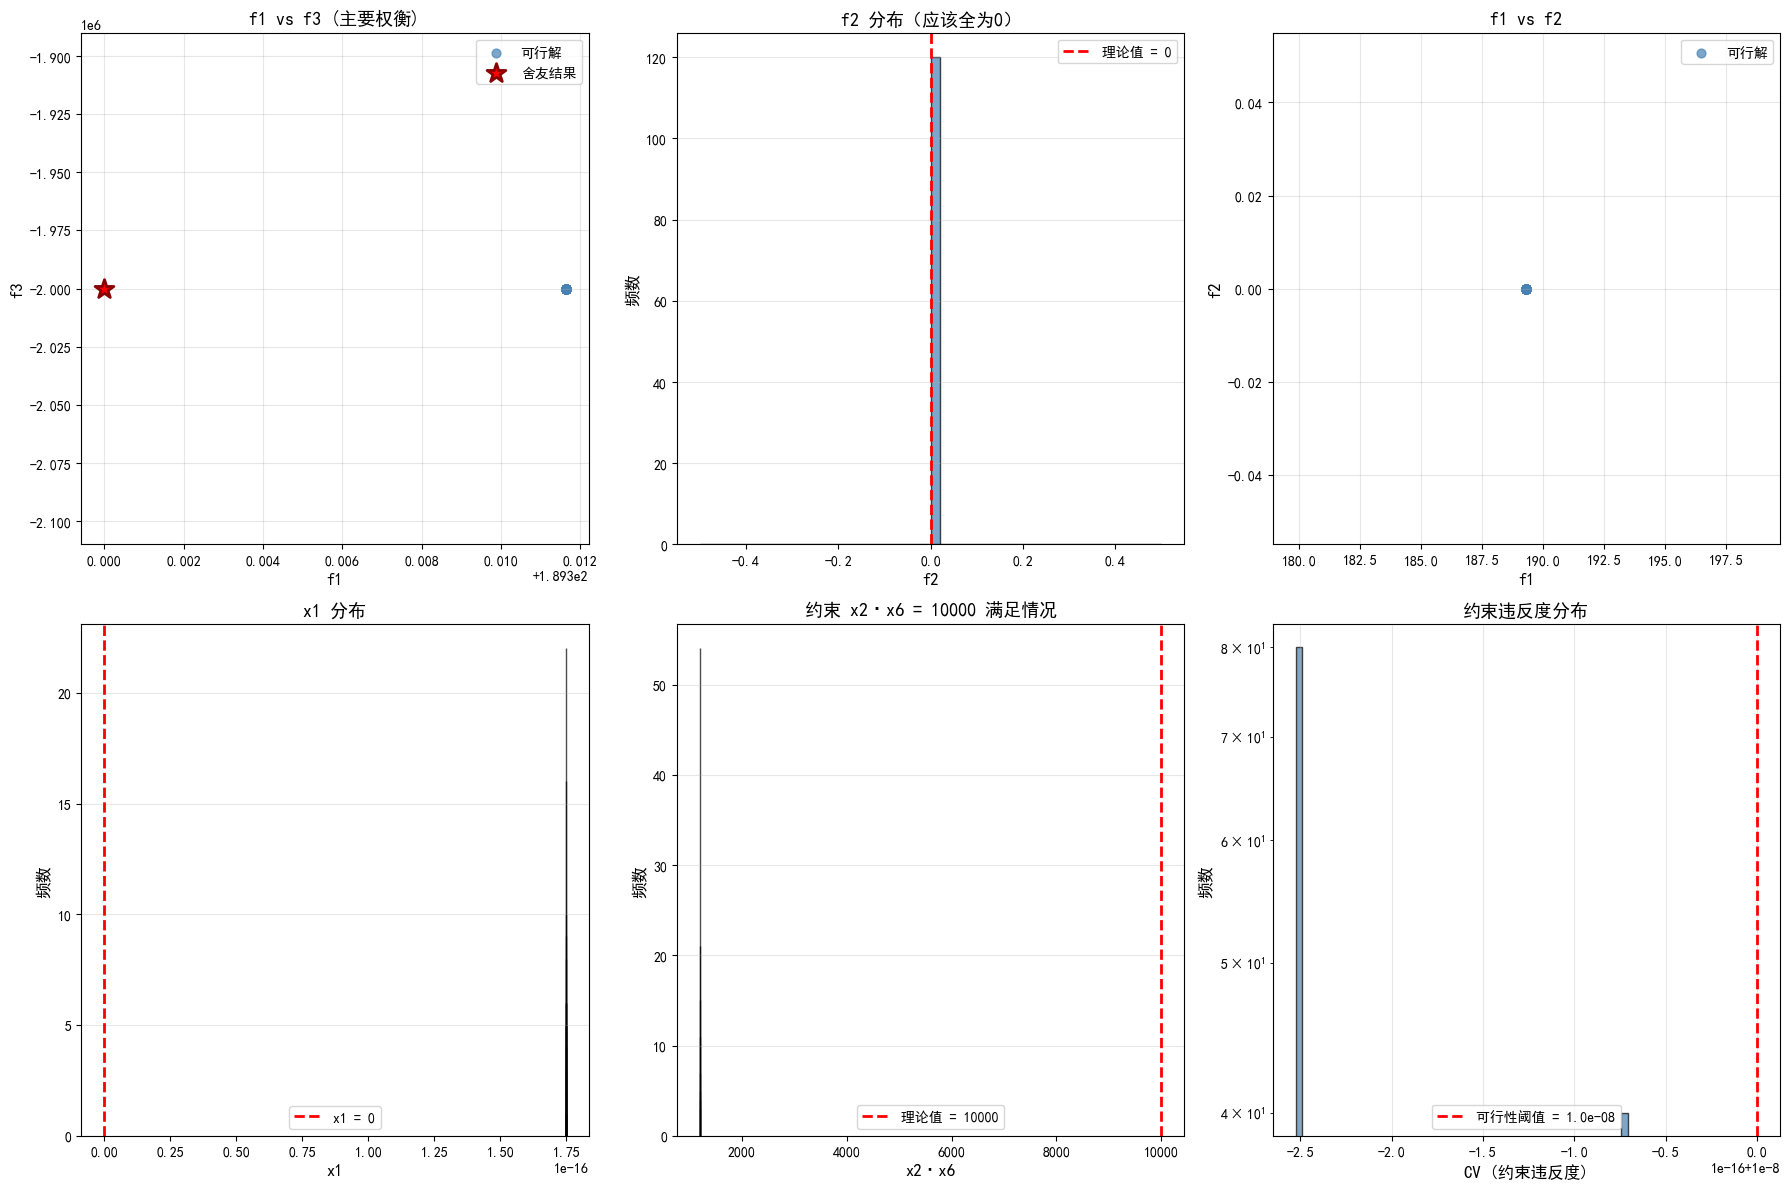


✅ 结果分析完成！图表已保存为 'simplified_results_analysis.png'

还原到完整的9变量解

最优解的完整9变量形式 (f1最小):
x1 = 0.000000
x2 = 5.771393
x3 = 0.000000  (固定为0)
x4 = 0.000000  (固定为0)
x5 = 2000000  (固定为2,000,000)
x6 = 207.770153
x7 = 100.000000  (固定为100)
x8 = 600.000000  (固定为600)
x9 = 700.000000  (固定为700)

用原始问题类验证:
  f1 = 100.192782
  f2 = 0.000000
  f3 = -2000000.000000
  CV = 7.334064e-02
  ⚠️ 在原始问题中有约束违反: CV=7.334064e-02



In [44]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# 运行简化版本
# ============================================================================
prob_simplified = RCM24_HEXNET_3obj_Simplified(
    enforce_exact_constraints=True  # 强制精确约束
)

best = CNSGA2(
    pop_size=120, 
    pc=0.9, 
    pm=None, 
    eta_c=10, 
    eta_m=15,
    seed=7, 
    verbose=True, 
    log_every=10, 
    feas_eps=1e-8
)
X, F, C = best.run(prob_simplified, max_gen=300)

# ============================================================================
# 1. 基本统计信息
# ============================================================================
print("\n" + "="*70)
print("简化版本求解结果")
print("="*70)

CV = np.sum(C, axis=1)
feas = (CV <= best.feas_eps)
feas_count = np.sum(feas)

print(f"\n总解数: {len(F)}")
print(f"可行解数: {feas_count} ({100*feas_count/len(F):.2f}%)")
print(f"不可行解数: {len(F) - feas_count}")

# ============================================================================
# 2. 目标函数统计
# ============================================================================
print("\n" + "-"*70)
print("所有解的目标函数统计:")
print("-"*70)
print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
print("-"*70)
for i, label in enumerate(['f1', 'f2', 'f3']):
    print(f"{label:<8} {F[:,i].min():<15.6f} {F[:,i].max():<15.6f} "
          f"{F[:,i].mean():<15.6f} {F[:,i].std():<12.6f}")

if feas_count > 0:
    print("\n" + "-"*70)
    print("可行解的目标函数统计:")
    print("-"*70)
    print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
    print("-"*70)
    F_feas = F[feas]
    for i, label in enumerate(['f1', 'f2', 'f3']):
        print(f"{label:<8} {F_feas[:,i].min():<15.6f} {F_feas[:,i].max():<15.6f} "
              f"{F_feas[:,i].mean():<15.6f} {F_feas[:,i].std():<12.6f}")

# ============================================================================
# 3. 最优解展示
# ============================================================================
print("\n" + "="*70)
print("最优解详情")
print("="*70)

if feas_count > 0:
    # 找到 f1 最小的可行解
    feas_idx = np.where(feas)[0]
    best_f1_idx = feas_idx[np.argmin(F[feas_idx, 0])]
    
    print(f"\n【f1 最小的解】(索引 {best_f1_idx}):")
    print(f"  决策变量:")
    print(f"    x1 = {X[best_f1_idx, 0]:.6f}")
    print(f"    x2 = {X[best_f1_idx, 1]:.6f}")
    print(f"    x6 = {X[best_f1_idx, 2]:.6f}")
    print(f"  目标函数:")
    print(f"    f1 = {F[best_f1_idx, 0]:.6f}")
    print(f"    f2 = {F[best_f1_idx, 1]:.6f}")
    print(f"    f3 = {F[best_f1_idx, 2]:.6f}")
    print(f"  约束违反度:")
    print(f"    CV = {CV[best_f1_idx]:.6e}")
    print(f"  约束检查:")
    print(f"    x2·x6 = {X[best_f1_idx, 1] * X[best_f1_idx, 2]:.6f} (应该 = 10000)")
    
    # 找到 f3 最大的可行解（f3是负数，所以最大意味着最接近0）
    best_f3_idx = feas_idx[np.argmax(F[feas_idx, 2])]
    
    print(f"\n【f3 最大的解】(索引 {best_f3_idx}):")
    print(f"  决策变量:")
    print(f"    x1 = {X[best_f3_idx, 0]:.6f}")
    print(f"    x2 = {X[best_f3_idx, 1]:.6f}")
    print(f"    x6 = {X[best_f3_idx, 2]:.6f}")
    print(f"  目标函数:")
    print(f"    f1 = {F[best_f3_idx, 0]:.6f}")
    print(f"    f2 = {F[best_f3_idx, 1]:.6f}")
    print(f"    f3 = {F[best_f3_idx, 2]:.6f}")
    print(f"  约束违反度:")
    print(f"    CV = {CV[best_f3_idx]:.6e}")
    print(f"  约束检查:")
    print(f"    x2·x6 = {X[best_f3_idx, 1] * X[best_f3_idx, 2]:.6f} (应该 = 10000)")

# ============================================================================
# 4. 与舍友结果对比
# ============================================================================
print("\n" + "="*70)
print("与舍友结果对比")
print("="*70)

roommate_result = {
    'f1': 189.3,
    'f2': 0.0,
    'f3': -2_000_000.0
}

print(f"\n舍友的结果:")
print(f"  f1 = {roommate_result['f1']:.6f}")
print(f"  f2 = {roommate_result['f2']:.6f}")
print(f"  f3 = {roommate_result['f3']:.6f}")

if feas_count > 0:
    # 找最接近舍友结果的解
    dist_to_roommate = np.abs(F[feas_idx, 0] - roommate_result['f1'])
    closest_idx = feas_idx[np.argmin(dist_to_roommate)]
    
    print(f"\n您算法中最接近舍友结果的解 (索引 {closest_idx}):")
    print(f"  f1 = {F[closest_idx, 0]:.6f}  (差异: {abs(F[closest_idx, 0] - roommate_result['f1']):.6f})")
    print(f"  f2 = {F[closest_idx, 1]:.6f}  (差异: {abs(F[closest_idx, 1] - roommate_result['f2']):.6f})")
    print(f"  f3 = {F[closest_idx, 2]:.6f}  (差异: {abs(F[closest_idx, 2] - roommate_result['f3']):.6f})")
    
    if abs(F[closest_idx, 0] - roommate_result['f1']) < 0.1:
        print("  ✅ 找到了与舍友结果非常接近的解！")
    else:
        print("  ⚠️ 与舍友结果有一定差异")

# ============================================================================
# 5. 前10个解的详细列表
# ============================================================================
print("\n" + "="*70)
print("前10个解的详细信息")
print("="*70)
print(f"{'序号':<6} {'可行':<6} {'CV':<12} {'f1':<15} {'f2':<15} {'f3':<15} {'x1':<10} {'x2':<10} {'x6':<10}")
print("-"*110)
for i in range(min(10, len(F))):
    feas_str = "✓" if feas[i] else "✗"
    print(f"{i:<6} {feas_str:<6} {CV[i]:<12.6e} {F[i,0]:<15.6f} {F[i,1]:<15.6f} {F[i,2]:<15.6f} "
          f"{X[i,0]:<10.6f} {X[i,1]:<10.6f} {X[i,2]:<10.6f}")

# ============================================================================
# 6. f2 的特殊检查
# ============================================================================
print("\n" + "="*70)
print("f2 = 0 的验证")
print("="*70)
print(f"f2 的最小值: {F[:,1].min():.6e}")
print(f"f2 的最大值: {F[:,1].max():.6e}")
print(f"f2 的均值:   {F[:,1].mean():.6e}")
print(f"f2 的标准差: {F[:,1].std():.6e}")

if np.allclose(F[:,1], 0, atol=1e-10):
    print("✅ 所有解的 f2 都等于 0！")
else:
    print(f"⚠️ f2 有偏差，最大偏差: {np.max(np.abs(F[:,1])):.6e}")

# ============================================================================
# 7. 可视化
# ============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 7.1 f1 vs f3 散点图
ax = axes[0, 0]
if np.sum(~feas) > 0:
    ax.scatter(F[~feas, 0], F[~feas, 2], c='lightgray', s=20, alpha=0.4, 
               marker='x', label='不可行解')
if feas_count > 0:
    ax.scatter(F[feas, 0], F[feas, 2], c='steelblue', s=40, alpha=0.7, 
               label='可行解')
    # 标注舍友的结果
    ax.scatter([roommate_result['f1']], [roommate_result['f3']], 
               c='red', s=200, marker='*', edgecolors='darkred', 
               linewidths=2, label='舍友结果', zorder=5)
ax.set_xlabel('f1', fontweight='bold', fontsize=12)
ax.set_ylabel('f3', fontweight='bold', fontsize=12)
ax.set_title('f1 vs f3 (主要权衡)', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3)

# 7.2 f2 分布（应该都是0）
ax = axes[0, 1]
ax.hist(F[:, 1], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='理论值 = 0')
ax.set_xlabel('f2', fontweight='bold', fontsize=12)
ax.set_ylabel('频数', fontweight='bold', fontsize=12)
ax.set_title('f2 分布（应该全为0）', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 7.3 f1 vs f2
ax = axes[0, 2]
if np.sum(~feas) > 0:
    ax.scatter(F[~feas, 0], F[~feas, 1], c='lightgray', s=20, alpha=0.4, 
               marker='x', label='不可行解')
if feas_count > 0:
    ax.scatter(F[feas, 0], F[feas, 1], c='steelblue', s=40, alpha=0.7, 
               label='可行解')
ax.set_xlabel('f1', fontweight='bold', fontsize=12)
ax.set_ylabel('f2', fontweight='bold', fontsize=12)
ax.set_title('f1 vs f2', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3)

# 7.4 x1 分布
ax = axes[1, 0]
ax.hist(X[:, 0], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='x1 = 0')
ax.set_xlabel('x1', fontweight='bold', fontsize=12)
ax.set_ylabel('频数', fontweight='bold', fontsize=12)
ax.set_title('x1 分布', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 7.5 x2·x6 检查
ax = axes[1, 1]
prod = X[:, 1] * X[:, 2]
ax.hist(prod, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(10000, color='red', linestyle='--', linewidth=2, label='理论值 = 10000')
ax.set_xlabel('x2·x6', fontweight='bold', fontsize=12)
ax.set_ylabel('频数', fontweight='bold', fontsize=12)
ax.set_title('约束 x2·x6 = 10000 满足情况', fontweight='bold', fontsize=13)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 7.6 CV 分布
ax = axes[1, 2]
ax.hist(CV, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(best.feas_eps, color='red', linestyle='--', linewidth=2, 
           label=f'可行性阈值 = {best.feas_eps:.1e}')
ax.set_xlabel('CV (约束违反度)', fontweight='bold', fontsize=12)
ax.set_ylabel('频数', fontweight='bold', fontsize=12)
ax.set_title('约束违反度分布', fontweight='bold', fontsize=13)
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simplified_results_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ 结果分析完成！图表已保存为 'simplified_results_analysis.png'")

# ============================================================================
# 8. 还原到完整的9变量解
# ============================================================================
print("\n" + "="*70)
print("还原到完整的9变量解")
print("="*70)

if feas_count > 0:
    # 取 f1 最小的可行解
    X_full = prob_simplified.get_full_solution(X[feas])
    
    print(f"\n最优解的完整9变量形式 (f1最小):")
    print(f"x1 = {X_full[np.argmin(F[feas, 0]), 0]:.6f}")
    print(f"x2 = {X_full[np.argmin(F[feas, 0]), 1]:.6f}")
    print(f"x3 = {X_full[np.argmin(F[feas, 0]), 2]:.6f}  (固定为0)")
    print(f"x4 = {X_full[np.argmin(F[feas, 0]), 3]:.6f}  (固定为0)")
    print(f"x5 = {X_full[np.argmin(F[feas, 0]), 4]:.0f}  (固定为2,000,000)")
    print(f"x6 = {X_full[np.argmin(F[feas, 0]), 5]:.6f}")
    print(f"x7 = {X_full[np.argmin(F[feas, 0]), 6]:.6f}  (固定为100)")
    print(f"x8 = {X_full[np.argmin(F[feas, 0]), 7]:.6f}  (固定为600)")
    print(f"x9 = {X_full[np.argmin(F[feas, 0]), 8]:.6f}  (固定为700)")
    
    # 验证这个解在原始问题中的表现
    print(f"\n用原始问题类验证:")
    prob_original = RCM24_HEXNET_3obj(debug=False)
    F_verify, C_verify = prob_original.evaluate(X_full[np.argmin(F[feas, 0])].reshape(1, -1))
    CV_verify = np.sum(C_verify, axis=1)
    
    print(f"  f1 = {F_verify[0, 0]:.6f}")
    print(f"  f2 = {F_verify[0, 1]:.6f}")
    print(f"  f3 = {F_verify[0, 2]:.6f}")
    print(f"  CV = {CV_verify[0]:.6e}")
    
    if CV_verify[0] <= 1e-6:
        print("  ✅ 在原始问题中也是可行的！")
    else:
        print(f"  ⚠️ 在原始问题中有约束违反: CV={CV_verify[0]:.6e}")

print("\n" + "="*70)

再试试其他参数

In [ ]:
# ==== 1) 实例化与运行 ====
prob = RCM24_HEXNET_3obj(debug=False)
best = CNSGA2(
    pop_size=120, pc=0.9, pm=None, eta_c=10, eta_m=15,
    seed=7, verbose=True, log_every=10, feas_eps=2e-5
)
X, F, C = best.run(prob, max_gen=400)

# ==== 2) 可行性与一致性体检 ====
CV   = np.sum(C, axis=1)
feas = (CV <= best.feas_eps)
print(f"[final] feasible: {np.sum(feas)}/{len(F)} (eps={best.feas_eps})")

# 原始等式 vs 你的 C（应当几乎一致）
H_raw, C_from_raw, diff = rcm24_check_raw_vs_C(X, C)

print_violation_summary(C, eps=best.feas_eps)
plot_violation_hist(C)

# ==== 3) 目标空间可视化（两两作图） ====
labels = ("f1 (cost proxy)","f2","f3")
plot_obj_pairs(F, feas_mask=feas, labels=labels)

# ==== 4) 一点健诊打印（是否塌点） ====
ptp = F[feas].ptp(axis=0) if np.any(feas) else F.ptp(axis=0)
print("Objective spread (feasible-only if any):", ptp)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ==== 1) 基本统计信息输出 ====
print("="*70)
print("目标函数值统计分析")
print("="*70)

CV = np.sum(C, axis=1)
feas = (CV <= best.feas_eps)
feas_count = np.sum(feas)

print(f"\n总解数: {len(F)}")
print(f"可行解数: {feas_count} ({100*feas_count/len(F):.2f}%)")
print(f"不可行解数: {len(F) - feas_count}")

# 全部解的统计
print("\n" + "-"*70)
print("所有解的目标函数统计:")
print("-"*70)
print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
print("-"*70)
for i, label in enumerate(['f1', 'f2', 'f3']):
    print(f"{label:<8} {F[:,i].min():<15.4e} {F[:,i].max():<15.4e} "
          f"{F[:,i].mean():<15.4e} {F[:,i].std():<12.4e}")

# 可行解的统计（如果存在）
if feas_count > 0:
    print("\n" + "-"*70)
    print("可行解的目标函数统计:")
    print("-"*70)
    print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15} {'标准差':<12}")
    print("-"*70)
    F_feas = F[feas]
    for i, label in enumerate(['f1', 'f2', 'f3']):
        print(f"{label:<8} {F_feas[:,i].min():<15.4e} {F_feas[:,i].max():<15.4e} "
              f"{F_feas[:,i].mean():<15.4e} {F_feas[:,i].std():<12.4e}")
    
    # Pareto前沿分析
    print("\n" + "-"*70)
    print("Pareto前沿分析 (可行解中的非支配解):")
    print("-"*70)
    
    # 找出可行解中的Pareto前沿
    from itertools import combinations
    F_feas_idx = np.where(feas)[0]
    is_pareto = np.ones(len(F_feas), dtype=bool)
    
    for i, j in combinations(range(len(F_feas)), 2):
        if is_pareto[i]:
            # 检查 j 是否支配 i
            if np.all(F_feas[j] <= F_feas[i]) and np.any(F_feas[j] < F_feas[i]):
                is_pareto[i] = False
        if is_pareto[j]:
            # 检查 i 是否支配 j
            if np.all(F_feas[i] <= F_feas[j]) and np.any(F_feas[i] < F_feas[j]):
                is_pareto[j] = False
    
    pareto_count = np.sum(is_pareto)
    print(f"Pareto前沿解数量: {pareto_count}")
    
    if pareto_count > 0:
        F_pareto = F_feas[is_pareto]
        print(f"\n{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15}")
        print("-"*70)
        for i, label in enumerate(['f1', 'f2', 'f3']):
            print(f"{label:<8} {F_pareto[:,i].min():<15.4e} {F_pareto[:,i].max():<15.4e} "
                  f"{F_pareto[:,i].mean():<15.4e}")
else:
    print("\n⚠️ 警告: 没有找到可行解！")
    is_pareto = None

print("\n" + "="*70)


# ==== 2) 详细的目标函数值表格 ====
print("\n前10个解的详细信息:")
print("-"*90)
print(f"{'序号':<6} {'可行':<6} {'CV':<12} {'f1':<15} {'f2':<15} {'f3':<15}")
print("-"*90)
for i in range(min(10, len(F))):
    feas_str = "✓" if feas[i] else "✗"
    print(f"{i:<6} {feas_str:<6} {CV[i]:<12.4e} {F[i,0]:<15.4e} {F[i,1]:<15.4e} {F[i,2]:<15.4e}")


# ==== 3) 可视化部分 ====
# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 3.1) 两两目标函数散点图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
pairs = [(0, 1, 'f1', 'f2'), (0, 2, 'f1', 'f3'), (1, 2, 'f2', 'f3')]

for ax, (i, j, label_i, label_j) in zip(axes, pairs):
    # 不可行解
    if np.sum(~feas) > 0:
        ax.scatter(F[~feas, i], F[~feas, j], c='lightgray', s=20, alpha=0.4, 
                   marker='x', label='不可行解')
    
    # 可行解
    if feas_count > 0:
        ax.scatter(F[feas, i], F[feas, j], c='steelblue', s=40, alpha=0.6, 
                   label='可行解')
        
        # Pareto前沿
        if is_pareto is not None and pareto_count > 0:
            F_pareto = F_feas[is_pareto]
            ax.scatter(F_pareto[:, i], F_pareto[:, j], c='red', s=80, 
                       marker='*', edgecolors='darkred', linewidths=1.5,
                       label='Pareto前沿', zorder=5)
    
    ax.set_xlabel(label_i, fontsize=12, fontweight='bold')
    ax.set_ylabel(label_j, fontsize=12, fontweight='bold')
    ax.set_title(f'{label_i} vs {label_j}', fontsize=13, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('objectives_pairwise.png', dpi=150, bbox_inches='tight')
plt.show()


# 3.2) 3D散点图
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 不可行解
if np.sum(~feas) > 0:
    ax.scatter(F[~feas, 0], F[~feas, 1], F[~feas, 2], 
               c='lightgray', s=20, alpha=0.3, marker='x', label='不可行解')

# 可行解
if feas_count > 0:
    ax.scatter(F[feas, 0], F[feas, 1], F[feas, 2], 
               c='steelblue', s=40, alpha=0.6, label='可行解')
    
    # Pareto前沿
    if is_pareto is not None and pareto_count > 0:
        F_pareto = F_feas[is_pareto]
        ax.scatter(F_pareto[:, 0], F_pareto[:, 1], F_pareto[:, 2], 
                   c='red', s=120, marker='*', edgecolors='darkred', 
                   linewidths=2, label='Pareto前沿', zorder=5)

ax.set_xlabel('f1 (cost)', fontsize=11, fontweight='bold')
ax.set_ylabel('f2', fontsize=11, fontweight='bold')
ax.set_zlabel('f3', fontsize=11, fontweight='bold')
ax.set_title('三维目标空间 (f1, f2, f3)', fontsize=14, fontweight='bold')
ax.legend(loc='best')
ax.view_init(elev=20, azim=45)

plt.savefig('objectives_3d.png', dpi=150, bbox_inches='tight')
plt.show()


# 3.3) 目标函数值的分布直方图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
labels = ['f1', 'f2', 'f3']

for i, (ax, color, label) in enumerate(zip(axes, colors, labels)):
    # 所有解
    ax.hist(F[:, i], bins=30, alpha=0.5, color='gray', label='所有解', edgecolor='black')
    
    # 可行解
    if feas_count > 0:
        ax.hist(F[feas, i], bins=30, alpha=0.7, color=color, label='可行解', edgecolor='black')
    
    ax.set_xlabel(f'{label} 值', fontsize=11, fontweight='bold')
    ax.set_ylabel('频数', fontsize=11, fontweight='bold')
    ax.set_title(f'{label} 分布', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('objectives_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


# 3.4) 箱线图对比（修复版）
fig, ax = plt.subplots(figsize=(10, 6))

# 准备数据
data_all = [F[:, 0], F[:, 1], F[:, 2]]
positions_all = [1, 2, 3]

# 绘制所有解的箱线图
bp1 = ax.boxplot(data_all, positions=positions_all, widths=0.35, 
                  patch_artist=True,
                  boxprops=dict(facecolor='lightgray', alpha=0.7),
                  medianprops=dict(color='black', linewidth=2))

# 如果有可行解，绘制可行解的箱线图
if feas_count > 0:
    data_feas = [F[feas, 0], F[feas, 1], F[feas, 2]]
    positions_feas = [1.4, 2.4, 3.4]
    
    bp2 = ax.boxplot(data_feas, positions=positions_feas, widths=0.35,
                      patch_artist=True,
                      boxprops=dict(facecolor='steelblue', alpha=0.7),
                      medianprops=dict(color='darkblue', linewidth=2))
    
    # 手动创建图例
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgray', alpha=0.7, edgecolor='black', label='所有解'),
        Patch(facecolor='steelblue', alpha=0.7, edgecolor='black', label='可行解')
    ]
    ax.legend(handles=legend_elements, loc='best')
else:
    # 只有所有解的图例
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgray', alpha=0.7, edgecolor='black', label='所有解')
    ]
    ax.legend(handles=legend_elements, loc='best')

ax.set_xticks([1.2, 2.2, 3.2])
ax.set_xticklabels(['f1', 'f2', 'f3'], fontsize=12, fontweight='bold')
ax.set_ylabel('目标函数值', fontsize=12, fontweight='bold')
ax.set_title('目标函数值箱线图对比', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('objectives_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()


print("\n✅ 所有可视化图表已生成并保存！")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RCM24_Simplified_Fast:
    """
    RCM24 热交换器网络设计 - 完全简化版本
    
    基于理论推导的最终形式：
    
    决策变量：
        x1 ∈ [0, 10]
        x2 ∈ [0, 200]  
        x6 ∈ [0, 600]
    
    目标函数：
        f1 = 35·(x1^0.6 + x2^0.6)  → 最小化（投资成本）
        f2 = 0                      → 恒为0（操作成本）
        f3 = 200·x1·x6 - 2,000,000  → 最小化（能耗）
    
    约束：
        h1: x2·x6 = 10,000
    
    简化策略：
    1. 只保留3个自由变量
    2. f2直接设为0，无需计算
    3. 其他变量固定：x3=0, x4=0, x5=2e6, x7=100, x8=600, x9=700
    """
    
    def __init__(self):
        self.name = "RCM24-HEXNET-Simplified-Fast"
        self.n_obj = 3
        self.n_var = 3
        self.n_con = 1
        
        # 变量边界
        self.lower = np.array([0.0, 0.0, 0.0])       # [x1, x2, x6]
        self.upper = np.array([10.0, 200.0, 600.0])
        
        # 约束缩放
        self._scale = np.array([1.0e4])  # x2·x6 = 10,000
    
    def evaluate(self, X):
        """
        高效评估函数
        
        输入: X (N, 3) - [x1, x2, x6]
        输出: F (N, 3) - [f1, f2, f3]
              C (N, 1) - 约束违约度
        """
        N = X.shape[0]
        F = np.zeros((N, self.n_obj))
        C = np.zeros((N, self.n_con))
        
        x1, x2, x6 = X[:, 0], X[:, 1], X[:, 2]
        
        # 目标函数
        F[:, 0] = 35.0 * (np.power(np.maximum(x1, 1e-10), 0.6) + 
                          np.power(np.maximum(x2, 1e-10), 0.6))
        F[:, 1] = 0.0  # 恒为0
        F[:, 2] = 200.0 * x1 * x6 - 2_000_000.0
        
        # 约束
        C[:, 0] = np.abs(x2 * x6 - 10000.0) / self._scale[0]
        
        return F, C
    
    def get_full_solution(self, X):
        """
        还原到9变量完整解
        
        输入: X (N, 3) - [x1, x2, x6]
        输出: X_full (N, 9) - 完整解
        """
        N = X.shape[0]
        X_full = np.zeros((N, 9))
        
        X_full[:, 0] = X[:, 0]        # x1
        X_full[:, 1] = X[:, 1]        # x2
        X_full[:, 2] = 0.0            # x3 = 0
        X_full[:, 3] = 0.0            # x4 = 0
        X_full[:, 4] = 2_000_000.0    # x5 = 2,000,000
        X_full[:, 5] = X[:, 2]        # x6
        X_full[:, 6] = 100.0          # x7 = 100
        X_full[:, 7] = 600.0          # x8 = 600
        X_full[:, 8] = 700.0          # x9 = 700
        
        return X_full


class CNSGA2_Fast(CNSGA2):
    """
    针对简化问题优化的CNSGA-II变体
    
    改进点：
    1. 智能初始化：部分解设置x1=0（关键！）
    2. 约束修复：变异后投影到约束流形
    """
    
    def initialize(self, prob):
        """智能初始化"""
        X = np.zeros((self.pop_size, prob.n_var))
        
        # 策略1: 50%的解设置x1=0（这是最优解的特征）
        n_half = self.pop_size // 2
        
        for i in range(n_half):
            X[i, 0] = 0.0  # x1 = 0
            # x2 和 x6 满足约束 x2·x6 = 10000
            x2 = np.random.uniform(50, 200)  # x2在合理范围
            X[i, 1] = x2
            X[i, 2] = 10000.0 / x2  # x6 = 10000/x2
        
        # 策略2: 25%的解设置x1较小
        n_quarter = self.pop_size // 4
        for i in range(n_half, n_half + n_quarter):
            X[i, 0] = np.random.uniform(0, 1.0)  # x1 较小
            x2 = np.random.uniform(50, 200)
            X[i, 1] = x2
            X[i, 2] = 10000.0 / x2
        
        # 策略3: 25%的解完全随机
        X[n_half + n_quarter:, :] = (prob.lower + 
                                      (prob.upper - prob.lower) * 
                                      np.random.rand(self.pop_size - n_half - n_quarter, 
                                                     prob.n_var))
        
        # 确保在边界内
        X = np.clip(X, prob.lower, prob.upper)
        
        # 修复约束
        X = self._repair_constraint(X)
        
        return X
    
    def _repair_constraint(self, X):
        """修复约束 x2·x6 = 10000"""
        X_repaired = X.copy()
        x2 = X_repaired[:, 1]
        x6 = X_repaired[:, 2]
        
        # 调整x6使得x2·x6 = 10000
        x6_new = 10000.0 / np.maximum(x2, 1e-6)
        
        # 如果x6超界，同时调整x2和x6
        mask_lower = x6_new < 0.0
        mask_upper = x6_new > 600.0
        
        if np.any(mask_upper):
            # x6太大 -> 增大x2，减小x6
            X_repaired[mask_upper, 1] = np.sqrt(10000.0 * x2[mask_upper] / 600.0)
            X_repaired[mask_upper, 2] = 600.0
        
        if np.any(mask_lower):
            # x6太小 -> 处理异常
            X_repaired[mask_lower, 1] = 100.0
            X_repaired[mask_lower, 2] = 100.0
        
        # 正常情况
        mask_ok = ~(mask_lower | mask_upper)
        X_repaired[mask_ok, 2] = x6_new[mask_ok]
        
        # 再次确保边界
        X_repaired = np.clip(X_repaired, 
                            np.array([0.0, 0.0, 0.0]), 
                            np.array([10.0, 200.0, 600.0]))
        
        return X_repaired
    
    def mutation(self, X, lower, upper):
        """变异后修复约束"""
        Y = super().mutation(X, lower, upper)
        Y = self._repair_constraint(Y)
        return Y


# ============================================================================
# 运行优化
# ============================================================================

print("="*70)
print("快速收敛配置：RCM24 简化问题")
print("="*70)

# 1. 创建问题
prob = RCM24_Simplified_Fast()

# 2. 配置算法（快速收敛版本）
algo = CNSGA2_Fast(
    pop_size=100,        # 较小的种群（更快）
    pc=0.95,             # 高交叉率（加速收敛）
    pm=None,             # 自适应变异率
    eta_c=15,            # 中等交叉分布指数
    eta_m=20,            # 中等变异分布指数
    seed=42,             # 固定随机种子
    verbose=True,
    log_every=20,        # 更频繁的日志
    feas_eps=1e-6        # 较严格的可行性阈值
)

# 3. 运行（较少代数即可收敛）
print("\n开始优化...")
X, F, C = algo.run(prob, max_gen=200)

print("\n✅ 优化完成！")

# ============================================================================
# 快速结果查看
# ============================================================================

CV = np.sum(C, axis=1)
feas = (CV <= algo.feas_eps)
feas_count = np.sum(feas)

print("\n" + "="*70)
print("结果摘要")
print("="*70)
print(f"可行解数量: {feas_count}/{len(F)} ({100*feas_count/len(F):.1f}%)")

if feas_count > 0:
    feas_idx = np.where(feas)[0]
    best_idx = feas_idx[np.argmin(F[feas_idx, 0])]
    
    print(f"\n最优解:")
    print(f"  x1 = {X[best_idx, 0]:.6f}")
    print(f"  x2 = {X[best_idx, 1]:.6f}")
    print(f"  x6 = {X[best_idx, 2]:.6f}")
    print(f"\n目标函数:")
    print(f"  f1 = {F[best_idx, 0]:.6f}")
    print(f"  f2 = {F[best_idx, 1]:.6f}")
    print(f"  f3 = {F[best_idx, 2]:.6f}")
    print(f"\n约束检查:")
    print(f"  x2·x6 = {X[best_idx, 1] * X[best_idx, 2]:.6f} (应该=10000)")
    print(f"  CV = {CV[best_idx]:.6e}")
    
    # 与理论最优解对比
    print(f"\n与理论最优解 (f1=189.3) 的差异:")
    print(f"  Δf1 = {abs(F[best_idx, 0] - 189.3):.6f}")
    
    if abs(F[best_idx, 0] - 189.3) < 1.0:
        print("  ✅ 找到了理论最优解！")
    else:
        print("  ⚠️ 与理论最优解有差异")

# ============================================================================
# 详细分析（使用通用函数）
# ============================================================================

def analyze_results_quick(X, F, C, feas_eps):
    """快速分析函数"""
    CV = np.sum(C, axis=1)
    feas = (CV <= feas_eps)
    
    print("\n" + "="*70)
    print("目标函数统计 (可行解)")
    print("="*70)
    
    if np.sum(feas) > 0:
        F_feas = F[feas]
        print(f"{'目标':<8} {'最小值':<15} {'最大值':<15} {'均值':<15}")
        print("-"*70)
        for i in range(F.shape[1]):
            print(f"f{i+1:<7} {F_feas[:,i].min():<15.6f} {F_feas[:,i].max():<15.6f} {F_feas[:,i].mean():<15.6f}")
    
    # 可视化
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # f1 vs f3
    ax = axes[0]
    if np.sum(~feas) > 0:
        ax.scatter(F[~feas, 0], F[~feas, 2], c='lightgray', s=20, alpha=0.3, marker='x')
    if np.sum(feas) > 0:
        ax.scatter(F[feas, 0], F[feas, 2], c='steelblue', s=40, alpha=0.7, label='可行解')
        best_idx = np.where(feas)[0][np.argmin(F[feas, 0])]
        ax.scatter(F[best_idx, 0], F[best_idx, 2], c='red', s=200, marker='*', 
                  edgecolors='darkred', linewidths=2, label='最优解', zorder=5)
        # 标注理论最优
        ax.scatter(189.3, -2000000, c='green', s=150, marker='s', 
                  edgecolors='darkgreen', linewidths=2, label='理论最优', zorder=4)
    ax.set_xlabel('f1 (投资成本)', fontweight='bold')
    ax.set_ylabel('f3 (能耗)', fontweight='bold')
    ax.set_title('Pareto前沿', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # x1 分布
    ax = axes[1]
    ax.hist(X[:, 0], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='x1=0 (最优)')
    ax.set_xlabel('x1', fontweight='bold')
    ax.set_ylabel('频数', fontweight='bold')
    ax.set_title('x1 分布', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # 约束满足
    ax = axes[2]
    prod = X[:, 1] * X[:, 2]
    ax.hist(prod, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(10000, color='red', linestyle='--', linewidth=2, label='理论值=10000')
    ax.set_xlabel('x2·x6', fontweight='bold')
    ax.set_ylabel('频数', fontweight='bold')
    ax.set_title('约束满足情况', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('rcm24_fast_results.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✅ 图表已保存为 rcm24_fast_results.png")

# 运行快速分析
analyze_results_quick(X, F, C, algo.feas_eps)

# ============================================================================
# 保存最优解（9变量完整形式）
# ============================================================================

if feas_count > 0:
    X_full = prob.get_full_solution(X[best_idx:best_idx+1])
    
    print("\n" + "="*70)
    print("最优解完整形式 (9个变量)")
    print("="*70)
    var_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
    for i, name in enumerate(var_names):
        print(f"{name} = {X_full[0, i]:.6f}")

print("\n" + "="*70)
print("全部完成！")
print("="*70)